In [ ]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

from scipy.io.arff import loadarff
from sklearn import preprocessing


# Load the tumor dataset
tumordata = loadarff('/content/primaryTumor.arff')
tumorTempdf = pd.DataFrame(tumordata[0])

tumordf = tumorTempdf.select_dtypes([object])
tumordf = tumordf.stack().str.decode('utf-8').unstack()


print(tumordf.head())

     age     sex histologicType degreeOfDiffe bone boneMarrow lung pleura  \
0   >=60  female              ?             ?   no         no   no     no   
1   >=60    male              ?        poorly   no         no   no     no   
2  30-59  female          adeno             ?   no         no   no    yes   
3  30-59  female          adeno             ?   no         no   no     no   
4  30-59  female          adeno             ?   no         no   no    yes   

  peritoneum liver brain skin neck supraclavicular axillar mediastinum  \
0         no   yes    no   no   no              no      no          no   
1         no   yes    no   no   no             yes      no         yes   
2         no    no    no  yes   no              no     yes          no   
3        yes    no    no   no   no              no      no          no   
4        yes    no    no   no   no              no      no          no   

  abdominal binaryClass  
0        no           P  
1        no           P  
2        no   

In [ ]:
# Load the wine dataset
winedf = pd.read_csv('/content/winequality-white.csv', header=0, sep=';', dtype={
    'fixed acidity': 'float64',
    'volatile acidity': 'float64',
    'citric acid': 'float64',
    'residual sugar': 'float64',
    'chlorides': 'float64',
    'free sulfur dioxide': 'float64',
    'total sulfur dioxide': 'float64',
    'density': 'float64',
    'pH': 'float64',
    'sulphates': 'float64',
    'alcohol': 'float64',
    'quality': 'int32',
})
print(winedf.head())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
4                 47.0                 186.0   0.9956  3.19       0.40   

   alcohol  quality  
0      8.8        6  
1      9.5        6  
2     10.1        6 

In [ ]:
winedf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int32  
dtypes: float64(11), int32(1)
memory usage: 440.2 KB


In [ ]:
winedf.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int32
dtype: object

In [ ]:
winedf.describe().T

count        mean        std      min         25%  \
fixed acidity         4898.0    6.854788   0.843868  3.80000    6.300000   
volatile acidity      4898.0    0.278241   0.100795  0.08000    0.210000   
citric acid           4898.0    0.334192   0.121020  0.00000    0.270000   
residual sugar        4898.0    6.391415   5.072058  0.60000    1.700000   
chlorides             4898.0    0.045772   0.021848  0.00900    0.036000   
free sulfur dioxide   4898.0   35.308085  17.007137  2.00000   23.000000   
total sulfur dioxide  4898.0  138.360657  42.498065  9.00000  108.000000   
density               4898.0    0.994027   0.002991  0.98711    0.991723   
pH                    4898.0    3.188267   0.151001  2.72000    3.090000   
sulphates             4898.0    0.489847   0.114126  0.22000    0.410000   
alcohol               4898.0   10.514267   1.230621  8.00000    9.500000   
quality               4898.0    5.877909   0.885639  3.00000    5.000000   

                            50%       75%        max  
fixed acidity           6.80000    7.3000   14.20000  
volatile acidity        0.26000    0.3200    1.10000  
citric acid             0.32000    0.3900    1.66000  
residual sugar          5.20000    9.9000   65.80000  
chlorides               0.04300    0.0500    0.34600  
free sulfur dioxide    34.00000   46.0000  289.00000  
total sulfur dioxide  134.00000  167.0000  440.00000  
density                 0.99374    0.9961    1.03898  
pH                      3.18000    3.2800    3.82000  
sulphates               0.47000    0.5500    1.08000  
alcohol                10.40000   11.4000   14.20000  
quality                 6.00000    6.0000    9.00000

In [ ]:
winedf.sum()

fixed acidity            33574.75000
volatile acidity          1362.82500
citric acid               1636.87000
residual sugar           31305.15000
chlorides                  224.19300
free sulfur dioxide     172939.00000
total sulfur dioxide    677690.50000
density                   4868.74609
pH                       15616.13000
sulphates                 2399.27000
alcohol                  51498.88000
quality                  28790.00000
dtype: float64

In [ ]:
winedf.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

array([[<Axes: title={'center': 'fixed acidity'}>,
        <Axes: title={'center': 'volatile acidity'}>,
        <Axes: title={'center': 'citric acid'}>],
       [<Axes: title={'center': 'residual sugar'}>,
        <Axes: title={'center': 'chlorides'}>,
        <Axes: title={'center': 'free sulfur dioxide'}>],
       [<Axes: title={'center': 'total sulfur dioxide'}>,
        <Axes: title={'center': 'density'}>,
        <Axes: title={'center': 'pH'}>],
       [<Axes: title={'center': 'sulphates'}>,
        <Axes: title={'center': 'alcohol'}>,
        <Axes: title={'center': 'quality'}>]], dtype=object)

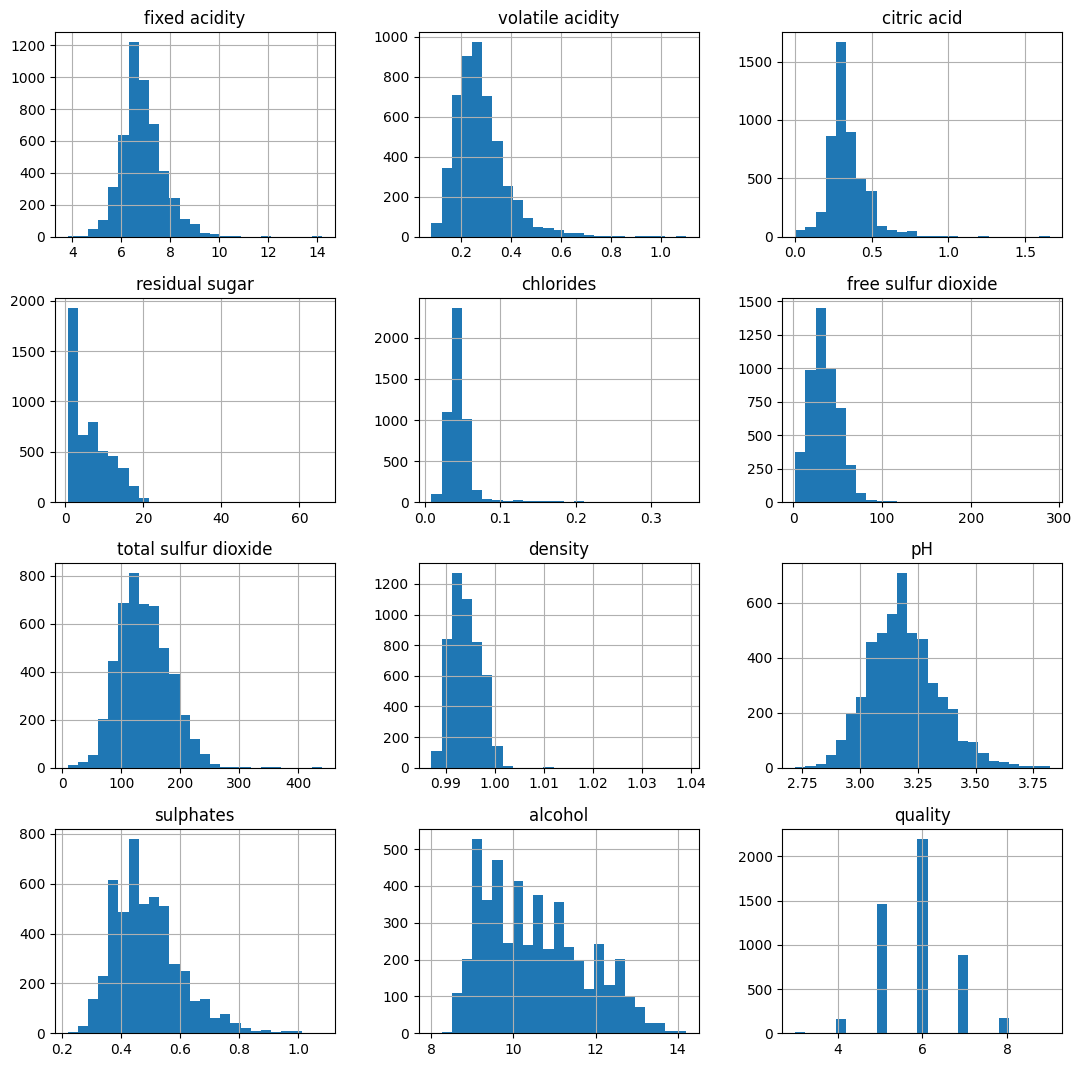

In [ ]:
winedf.hist(bins=25, figsize=(13, 13))

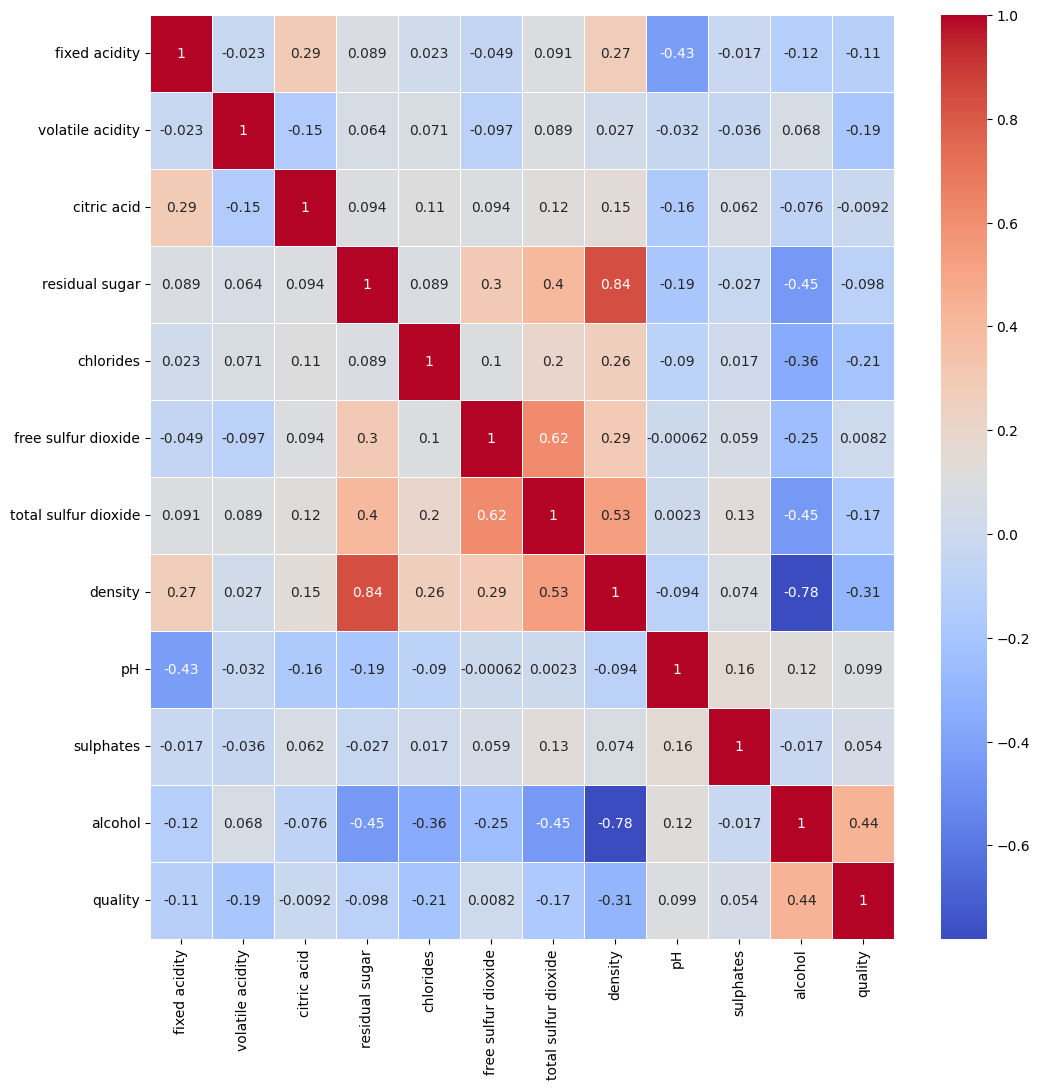

In [ ]:
plt.figure(figsize=(12, 12))
sb.heatmap(winedf.corr(), linewidths=0.5, annot=True, cmap="coolwarm")
plt.show()

In [ ]:
#sb.pairplot(winedf, hue="quality", palette="crest") #takes long time to run, so comment out for faster times

In [ ]:
tumordf

age     sex histologicType degreeOfDiffe bone boneMarrow lung pleura  \
0     >=60  female              ?             ?   no         no   no     no   
1     >=60    male              ?        poorly   no         no   no     no   
2    30-59  female          adeno             ?   no         no   no    yes   
3    30-59  female          adeno             ?   no         no   no     no   
4    30-59  female          adeno             ?   no         no   no    yes   
..     ...     ...            ...           ...  ...        ...  ...    ...   
334  30-59  female          adeno          well   no         no   no     no   
335  30-59    male     epidermoid        poorly  yes         no   no     no   
336  30-59  female          adeno          well   no         no   no    yes   
337  30-59  female          adeno             ?  yes         no  yes    yes   
338  30-59  female          adeno          well   no         no   no    yes   

    peritoneum liver brain skin neck supraclavicular axillar mediastinum  \
0           no   yes    no   no   no              no      no          no   
1           no   yes    no   no   no             yes      no         yes   
2           no    no    no  yes   no              no     yes          no   
3          yes    no    no   no   no              no      no          no   
4          yes    no    no   no   no              no      no          no   
..         ...   ...   ...  ...  ...             ...     ...         ...   
334        yes    no    no   no   no              no      no          no   
335         no    no    no  yes   no              no     yes          no   
336        yes    no    no   no   no              no      no          no   
337        yes   yes   yes   no   no              no      no          no   
338        yes    no    no   no   no              no      no          no   

    abdominal binaryClass  
0          no           P  
1          no           P  
2          no           N  
3          no           N  
4          no           N  
..        ...         ...  
334        no           N  
335        no           P  
336        no           N  
337       yes           N  
338        no           N  

[339 rows x 18 columns]

In [ ]:
# convert tumor data types into usable types. could I have done the yes/no ones all at once? probably. but doing it explicitly was easier
tumordf = tumordf.replace('?', np.nan)

tumordf.sex = tumordf.sex.astype('category')
tumordf.bone = tumordf.bone.map(dict(no=0, yes=1))
tumordf.boneMarrow = tumordf.boneMarrow.map(dict(no=0, yes=1))
tumordf.lung = tumordf.lung.map(dict(no=0, yes=1))
tumordf.pleura = tumordf.pleura.map(dict(no=0, yes=1))
tumordf.peritoneum = tumordf.peritoneum.map(dict(no=0, yes=1))
tumordf.liver = tumordf.liver.map(dict(no=0, yes=1))
tumordf.brain = tumordf.brain.map(dict(no=0, yes=1))
tumordf.skin = tumordf.skin.map(dict(no=0, yes=1))
tumordf.neck = tumordf.neck.map(dict(no=0, yes=1))
tumordf.supraclavicular = tumordf.supraclavicular.map(dict(no=0, yes=1))
tumordf.axillar = tumordf.axillar.map(dict(no=0, yes=1))
tumordf.mediastinum = tumordf.mediastinum.map(dict(no=0, yes=1))
tumordf.abdominal = tumordf.abdominal.map(dict(no=0, yes=1))

tumordf.bone = tumordf.bone.astype('bool')
tumordf.boneMarrow = tumordf.boneMarrow.astype('bool')
tumordf.lung = tumordf.lung.astype('bool')
tumordf.pleura = tumordf.pleura.astype('bool')
tumordf.peritoneum = tumordf.peritoneum.astype('bool')
tumordf.liver = tumordf.liver.astype('bool')
tumordf.brain = tumordf.brain.astype('bool')
tumordf.skin = tumordf.skin.astype('bool')
tumordf.neck = tumordf.neck.astype('bool')
tumordf.supraclavicular = tumordf.supraclavicular.astype('bool')
tumordf.axillar = tumordf.axillar.astype('bool')
tumordf.mediastinum = tumordf.mediastinum.astype('bool')
tumordf.abdominal = tumordf.abdominal.astype('bool')



tumordf.age = tumordf.age.astype(pd.CategoricalDtype(['<30', '30-59', '>=60'], ordered=True))
tumordf.histologicType = tumordf.histologicType.astype('category')
tumordf.degreeOfDiffe = tumordf.degreeOfDiffe.astype(pd.CategoricalDtype(['poorly', 'fairly', 'well'], ordered=True))
tumordf.binaryClass = tumordf.binaryClass.astype('category')

tumordf

age     sex histologicType degreeOfDiffe   bone  boneMarrow   lung  \
0     >=60  female            NaN           NaN  False       False  False   
1     >=60    male            NaN        poorly  False       False  False   
2    30-59  female          adeno           NaN  False       False  False   
3    30-59  female          adeno           NaN  False       False  False   
4    30-59  female          adeno           NaN  False       False  False   
..     ...     ...            ...           ...    ...         ...    ...   
334  30-59  female          adeno          well  False       False  False   
335  30-59    male     epidermoid        poorly   True       False  False   
336  30-59  female          adeno          well  False       False  False   
337  30-59  female          adeno           NaN   True       False   True   
338  30-59  female          adeno          well  False       False  False   

     pleura  peritoneum  liver  brain   skin   neck  supraclavicular  axillar  \
0     False       False   True  False  False  False            False    False   
1     False       False   True  False  False  False             True    False   
2      True       False  False  False   True  False            False     True   
3     False        True  False  False  False  False            False    False   
4      True        True  False  False  False  False            False    False   
..      ...         ...    ...    ...    ...    ...              ...      ...   
334   False        True  False  False  False  False            False    False   
335   False       False  False  False   True  False            False     True   
336    True        True  False  False  False  False            False    False   
337    True        True   True   True  False  False            False    False   
338    True        True  False  False  False  False            False    False   

     mediastinum  abdominal binaryClass  
0          False      False           P  
1           True      False           P  
2          False      False           N  
3          False      False           N  
4          False      False           N  
..           ...        ...         ...  
334        False      False           N  
335        False      False           P  
336        False      False           N  
337        False       True           N  
338        False      False           N  

[339 rows x 18 columns]

In [ ]:
tumordf.info()


<class 'pandas.core.frame.DataFrame'>
Index: 339 entries, 0 to 338
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   age              339 non-null    category
 1   sex              338 non-null    category
 2   histologicType   272 non-null    category
 3   degreeOfDiffe    184 non-null    category
 4   bone             339 non-null    bool    
 5   boneMarrow       339 non-null    bool    
 6   lung             339 non-null    bool    
 7   pleura           339 non-null    bool    
 8   peritoneum       339 non-null    bool    
 9   liver            339 non-null    bool    
 10  brain            339 non-null    bool    
 11  skin             339 non-null    bool    
 12  neck             339 non-null    bool    
 13  supraclavicular  339 non-null    bool    
 14  axillar          339 non-null    bool    
 15  mediastinum      339 non-null    bool    
 16  abdominal        339 non-null    bool    
 17  bi

In [ ]:
tumordf.dtypes


age                category
sex                category
histologicType     category
degreeOfDiffe      category
bone                   bool
boneMarrow             bool
lung                   bool
pleura                 bool
peritoneum             bool
liver                  bool
brain                  bool
skin                   bool
neck                   bool
supraclavicular        bool
axillar                bool
mediastinum            bool
abdominal              bool
binaryClass        category
dtype: object

In [ ]:
tumordf.describe().T


count unique     top freq
age               339      3   30-59  209
sex               338      2  female  177
histologicType    272      3   adeno  220
degreeOfDiffe     184      3  poorly  100
bone              339      2   False  245
boneMarrow        339      2   False  332
lung              339      2   False  264
pleura            339      2   False  264
peritoneum        339      2   False  244
liver             339      2   False  230
brain             339      2   False  318
skin              339      2   False  318
neck              339      2   False  295
supraclavicular   339      2   False  278
axillar           339      2   False  305
mediastinum       339      2   False  247
abdominal         339      2   False  224
binaryClass       339      2       N  255

In [ ]:
tumordf.isnull().sum()


age                  0
sex                  1
histologicType      67
degreeOfDiffe      155
bone                 0
boneMarrow           0
lung                 0
pleura               0
peritoneum           0
liver                0
brain                0
skin                 0
neck                 0
supraclavicular      0
axillar              0
mediastinum          0
abdominal            0
binaryClass          0
dtype: int64

In [ ]:
posDf = tumordf[tumordf['binaryClass'] == 'P']
negDf = tumordf[tumordf['binaryClass'] == 'N']

posDf.describe().T

count unique     top freq
age                84      3   30-59   57
sex                84      2    male   55
histologicType     46      3   adeno   20
degreeOfDiffe      63      3  poorly   55
bone               84      2   False   51
boneMarrow         84      2   False   81
lung               84      2   False   68
pleura             84      2   False   60
peritoneum         84      2   False   70
liver              84      2   False   55
brain              84      2   False   71
skin               84      2   False   73
neck               84      2   False   78
supraclavicular    84      2   False   60
axillar            84      2   False   78
mediastinum        84      2    True   52
abdominal          84      2   False   63
binaryClass        84      1       P   84

In [ ]:
negDf.describe().T

count unique     top freq
age               255      3   30-59  152
sex               254      2  female  148
histologicType    226      3   adeno  200
degreeOfDiffe     121      3    well   52
bone              255      2   False  194
boneMarrow        255      2   False  251
lung              255      2   False  196
pleura            255      2   False  204
peritoneum        255      2   False  174
liver             255      2   False  175
brain             255      2   False  247
skin              255      2   False  245
neck              255      2   False  217
supraclavicular   255      2   False  218
axillar           255      2   False  227
mediastinum       255      2   False  215
abdominal         255      2   False  161
binaryClass       255      1       N  255

In [ ]:
posDf.head()

age     sex histologicType degreeOfDiffe   bone  boneMarrow   lung  \
0    >=60  female            NaN           NaN  False       False  False   
1    >=60    male            NaN        poorly  False       False  False   
7   30-59  female          adeno           NaN   True       False  False   
10   >=60  female            NaN           NaN  False       False  False   
14  30-59    male     epidermoid          well   True       False  False   

    pleura  peritoneum  liver  brain   skin   neck  supraclavicular  axillar  \
0    False       False   True  False  False  False            False    False   
1    False       False   True  False  False  False             True    False   
7    False       False  False   True  False  False            False    False   
10   False        True   True  False  False  False             True    False   
14   False       False  False  False   True   True             True    False   

    mediastinum  abdominal binaryClass  
0         False      False           P  
1          True      False           P  
7          True      False           P  
10        False      False           P  
14        False      False           P

<Axes: xlabel='binaryClass'>

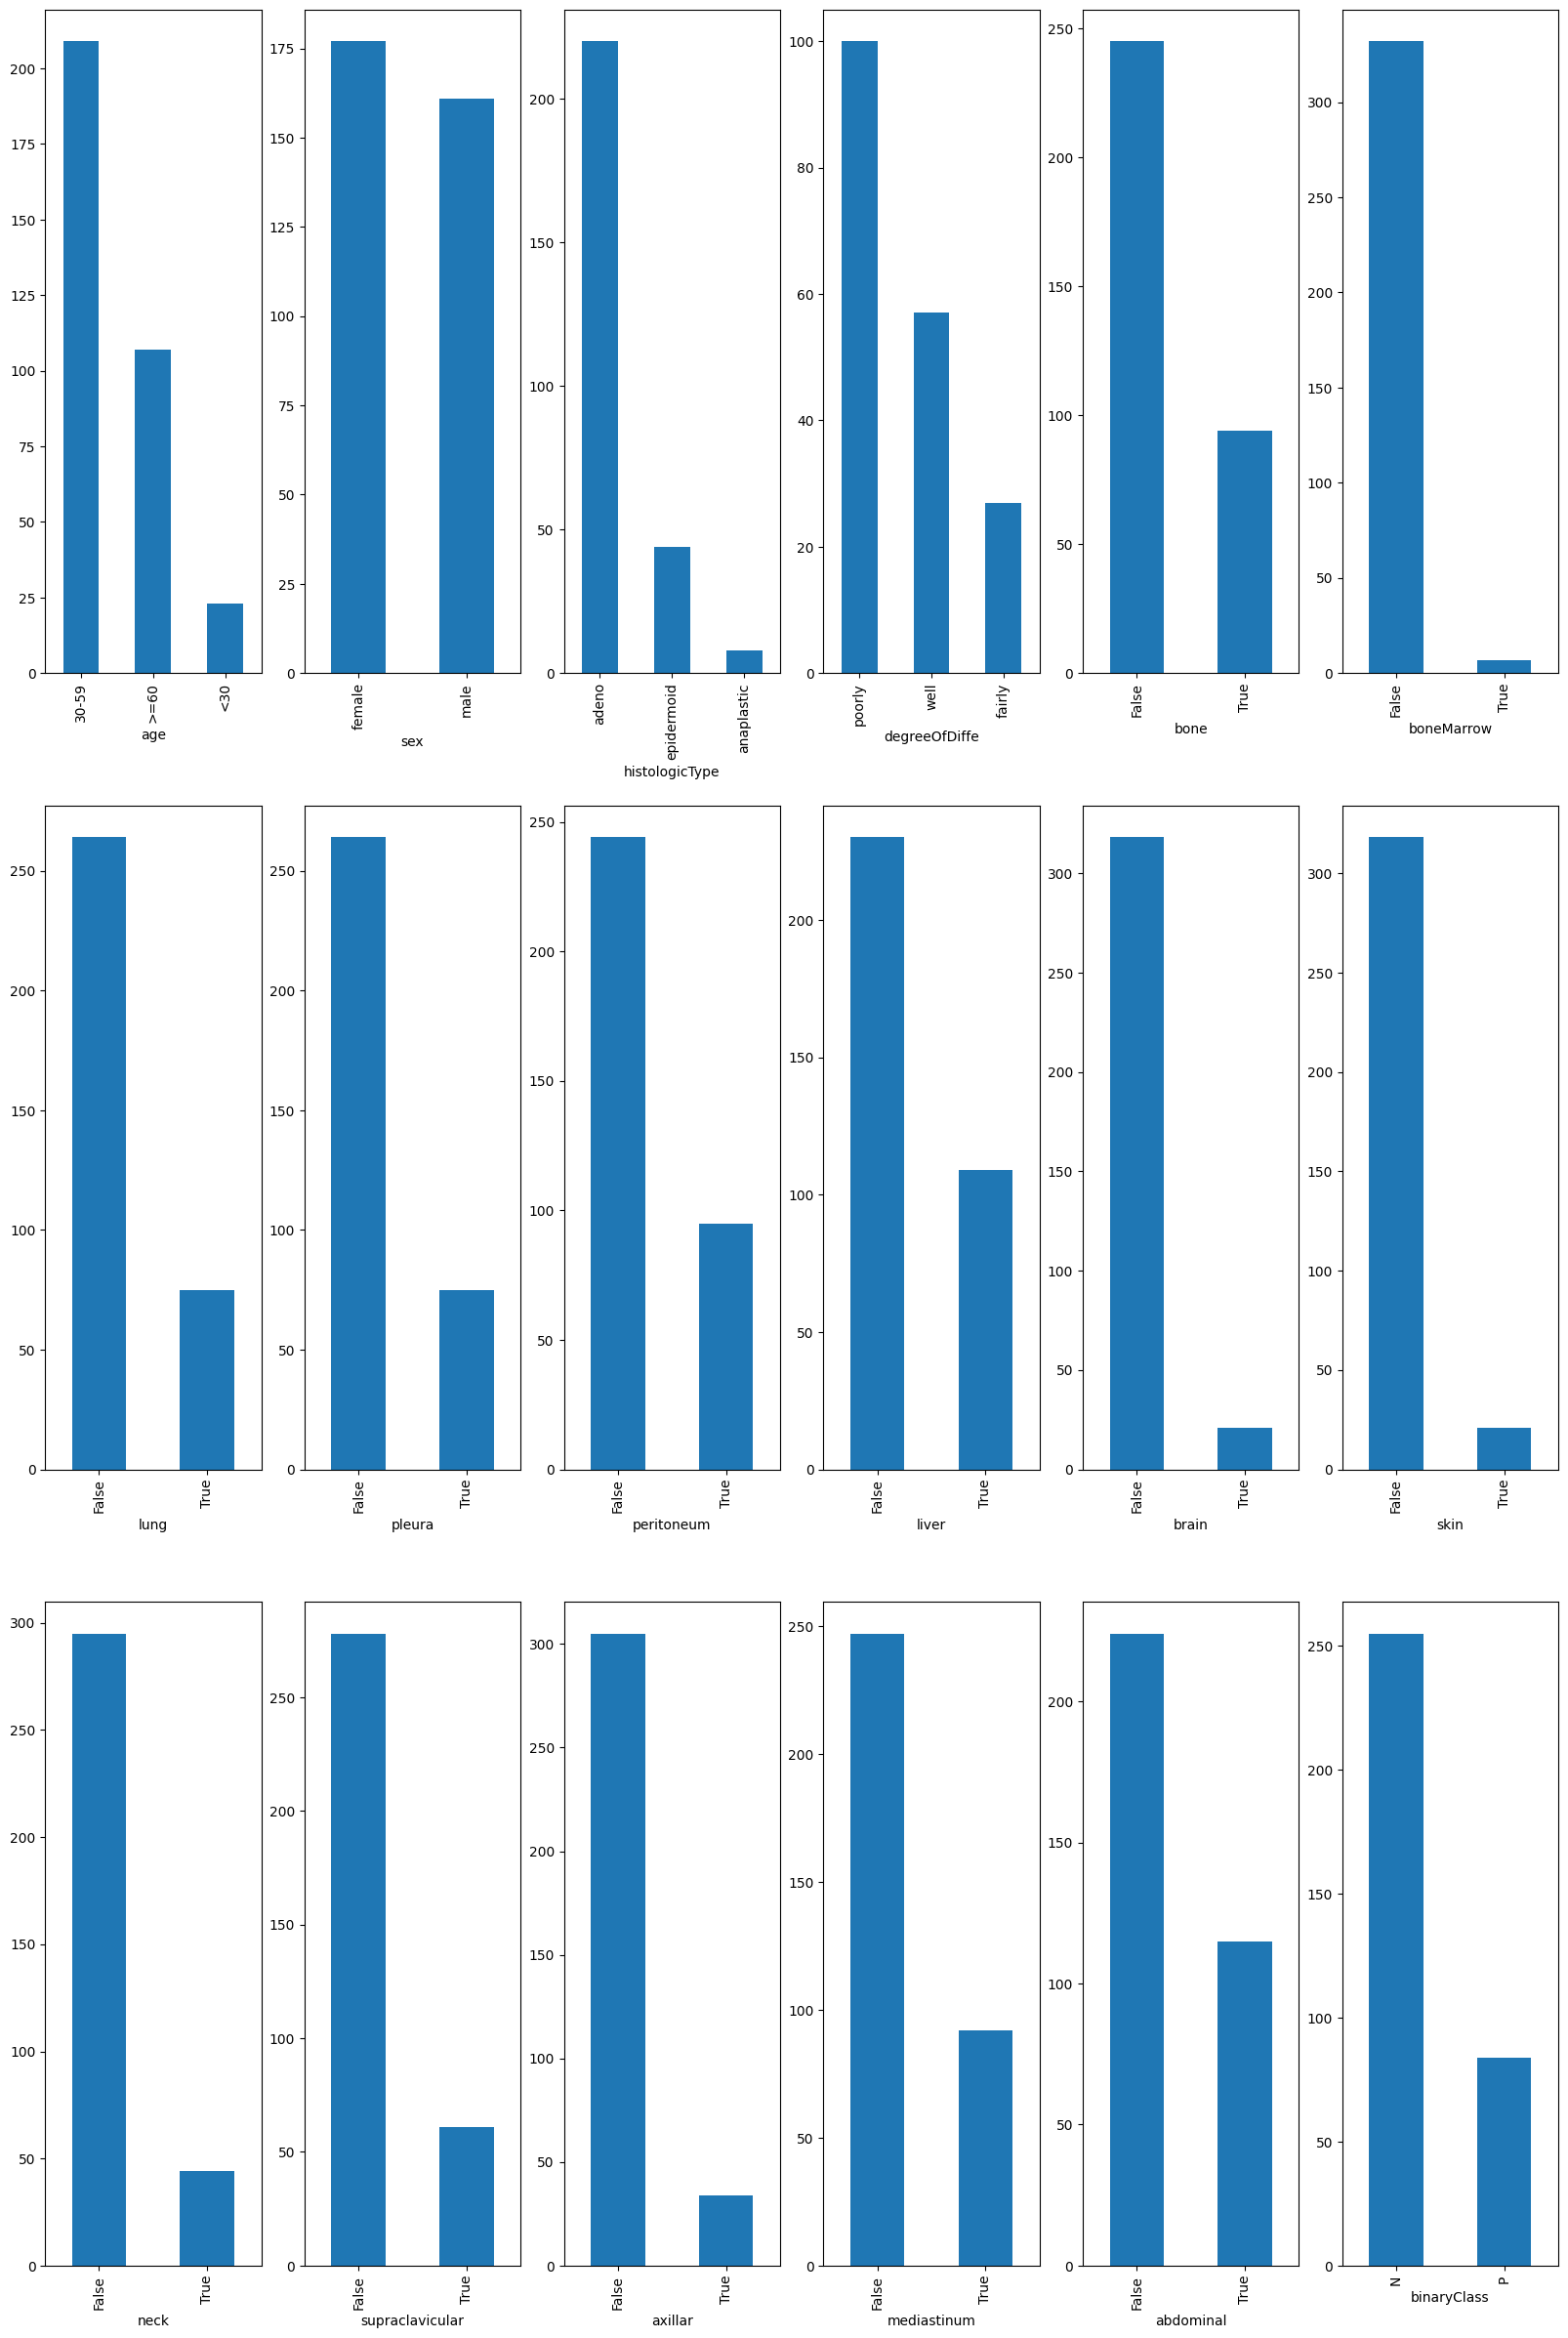

In [ ]:
fig, axes = plt.subplots(nrows = 3, ncols=6, figsize=(20,30))

tumordf.age.value_counts().plot(kind='bar', ax=axes[0,0])
tumordf.sex.value_counts().plot(kind='bar', ax=axes[0,1])
tumordf.histologicType.value_counts().plot(kind='bar', ax=axes[0,2])
tumordf.degreeOfDiffe.value_counts().plot(kind='bar', ax=axes[0,3])
tumordf.bone.value_counts().plot(kind='bar', ax=axes[0,4])
tumordf.boneMarrow.value_counts().plot(kind='bar', ax=axes[0,5])

tumordf.lung.value_counts().plot(kind='bar', ax=axes[1,0])
tumordf.pleura.value_counts().plot(kind='bar', ax=axes[1,1])
tumordf.peritoneum.value_counts().plot(kind='bar', ax=axes[1,2])
tumordf.liver.value_counts().plot(kind='bar', ax=axes[1,3])
tumordf.brain.value_counts().plot(kind='bar', ax=axes[1,4])
tumordf.skin.value_counts().plot(kind='bar', ax=axes[1,5])

tumordf.neck.value_counts().plot(kind='bar', ax=axes[2,0])
tumordf.supraclavicular.value_counts().plot(kind='bar', ax=axes[2,1])
tumordf.axillar.value_counts().plot(kind='bar', ax=axes[2,2])
tumordf.mediastinum.value_counts().plot(kind='bar', ax=axes[2,3])
tumordf.abdominal.value_counts().plot(kind='bar', ax=axes[2,4])
tumordf.binaryClass.value_counts().plot(kind='bar', ax=axes[2,5])

<Axes: xlabel='binaryClass'>

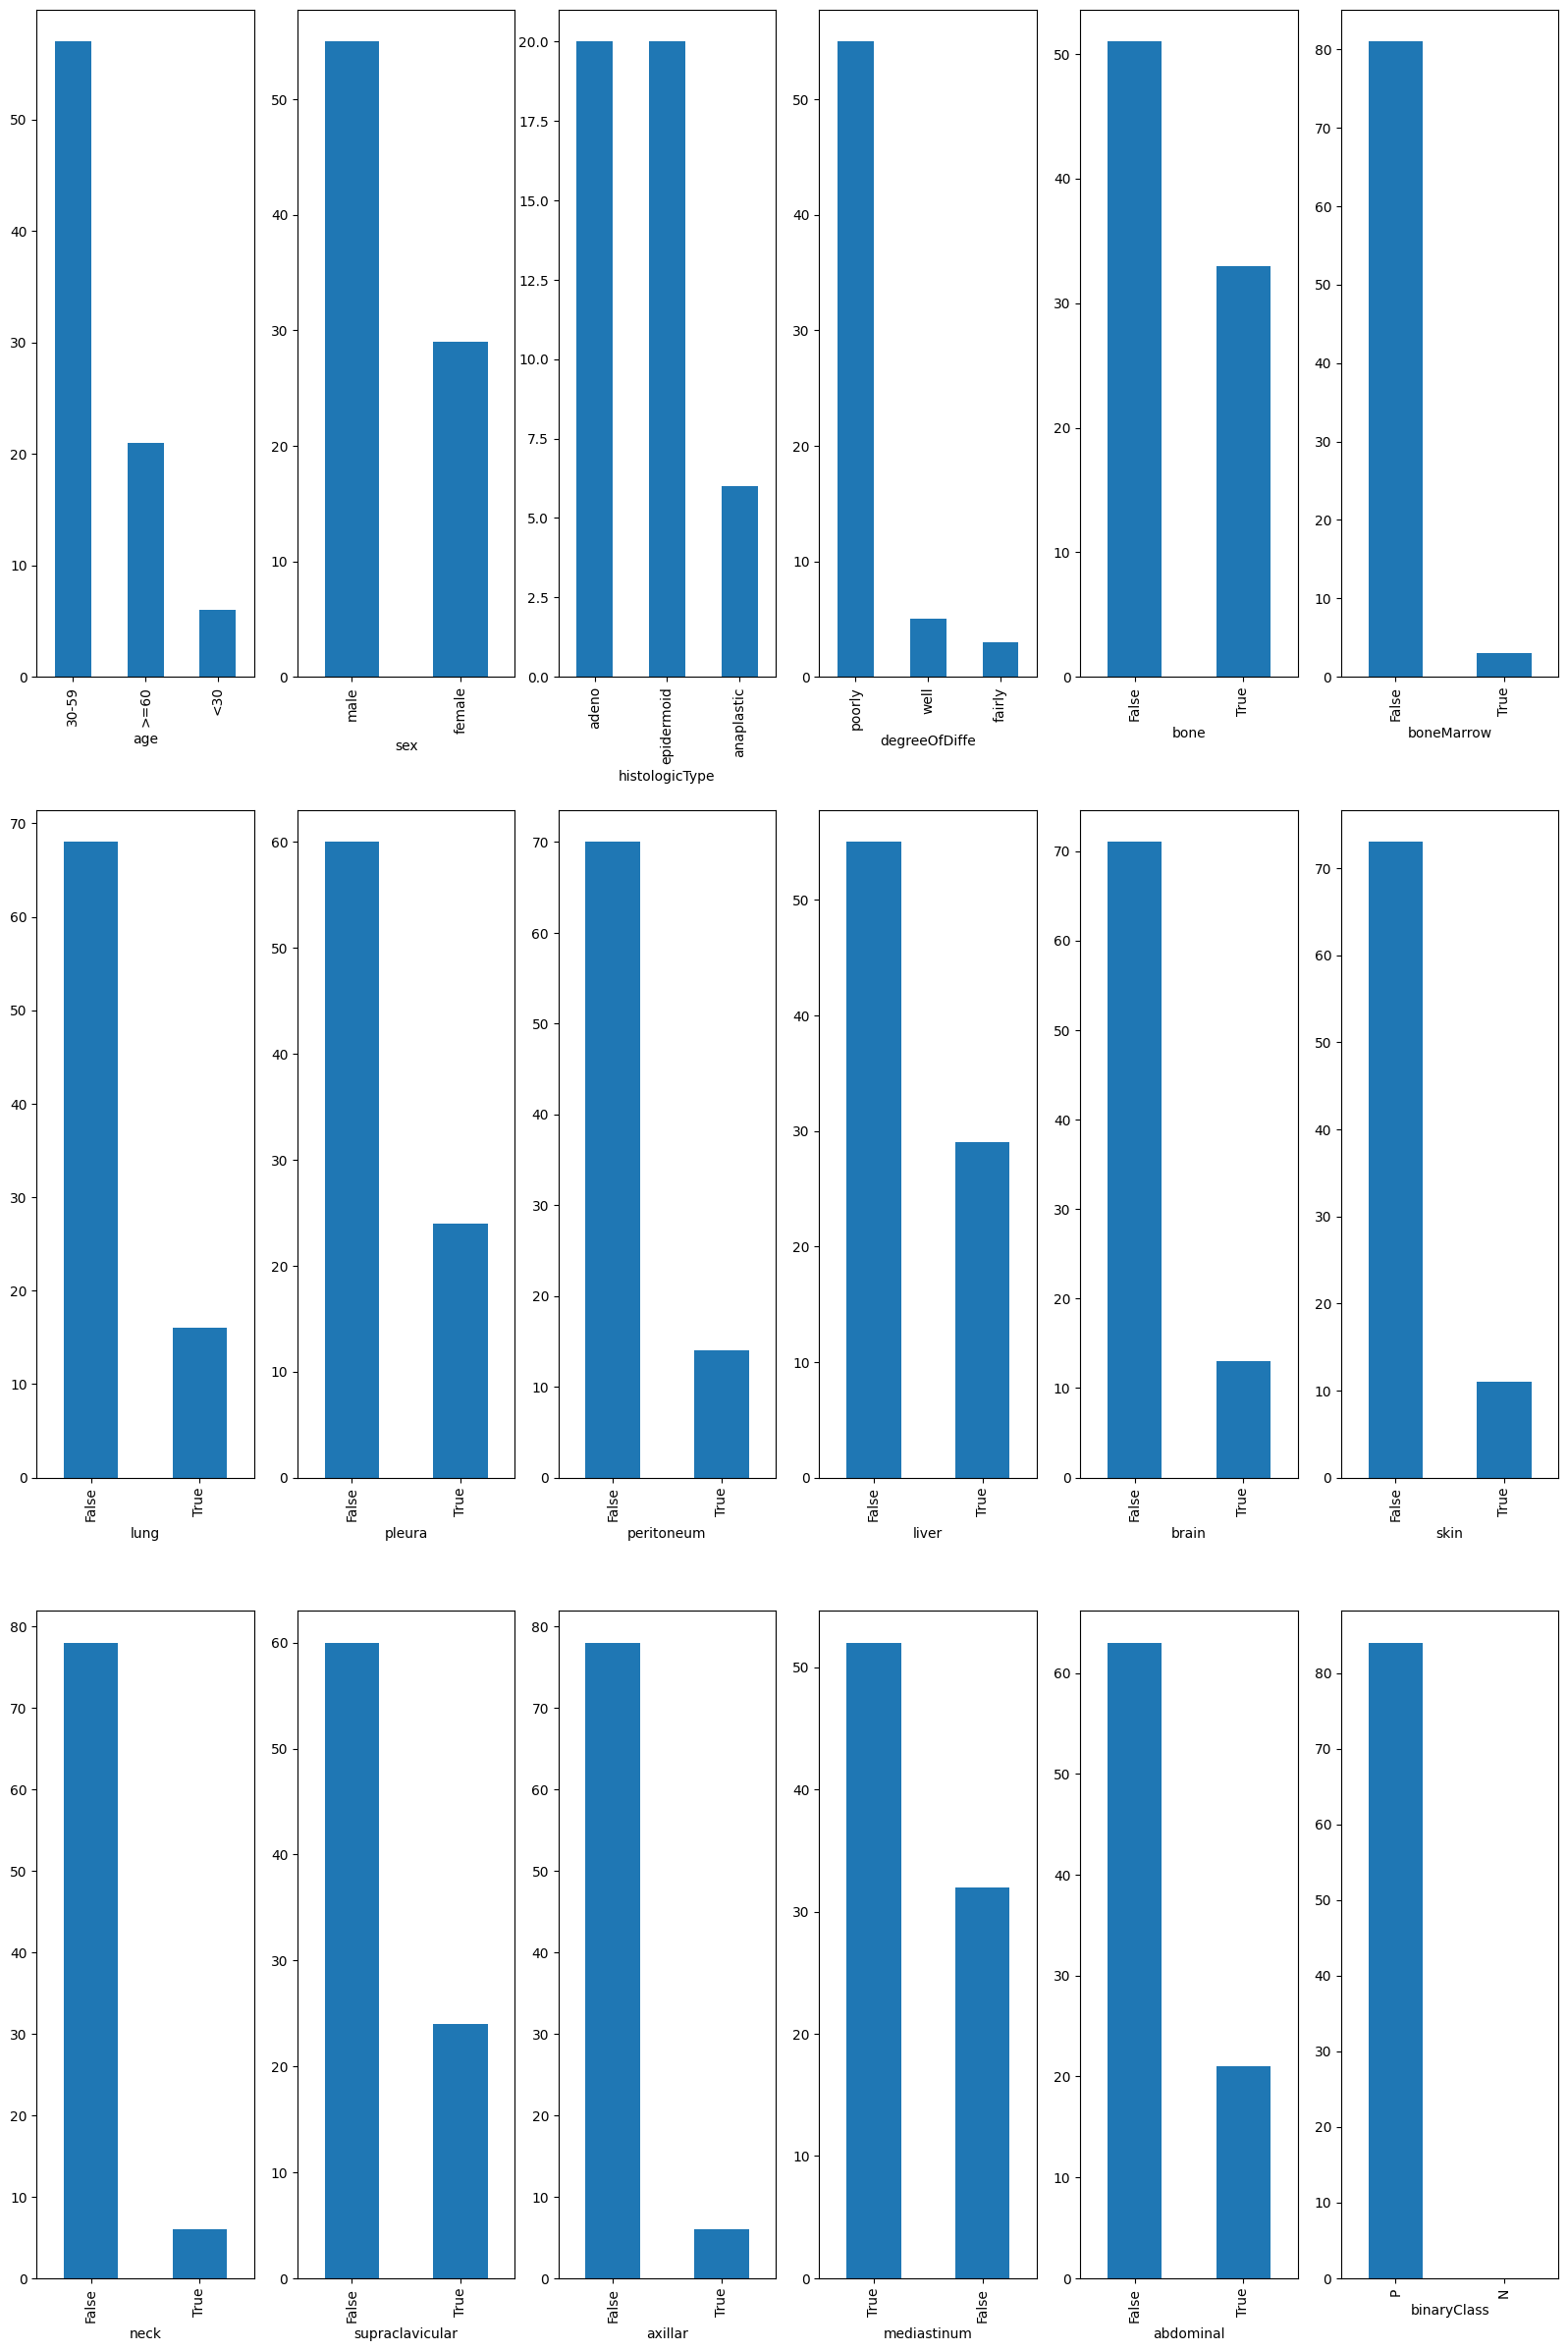

In [ ]:
figp, axes = plt.subplots(nrows = 3, ncols=6, figsize=(20,30))

posDf.age.value_counts().plot(kind='bar', ax=axes[0,0])
posDf.sex.value_counts().plot(kind='bar', ax=axes[0,1])
posDf.histologicType.value_counts().plot(kind='bar', ax=axes[0,2])
posDf.degreeOfDiffe.value_counts().plot(kind='bar', ax=axes[0,3])
posDf.bone.value_counts().plot(kind='bar', ax=axes[0,4])
posDf.boneMarrow.value_counts().plot(kind='bar', ax=axes[0,5])
posDf.lung.value_counts().plot(kind='bar', ax=axes[1,0])
posDf.pleura.value_counts().plot(kind='bar', ax=axes[1,1])
posDf.peritoneum.value_counts().plot(kind='bar', ax=axes[1,2])
posDf.liver.value_counts().plot(kind='bar', ax=axes[1,3])
posDf.brain.value_counts().plot(kind='bar', ax=axes[1,4])
posDf.skin.value_counts().plot(kind='bar', ax=axes[1,5])
posDf.neck.value_counts().plot(kind='bar', ax=axes[2,0])
posDf.supraclavicular.value_counts().plot(kind='bar', ax=axes[2,1])
posDf.axillar.value_counts().plot(kind='bar', ax=axes[2,2])
posDf.mediastinum.value_counts().plot(kind='bar', ax=axes[2,3])
posDf.abdominal.value_counts().plot(kind='bar', ax=axes[2,4])
posDf.binaryClass.value_counts().plot(kind='bar', ax=axes[2,5])

<Axes: xlabel='binaryClass'>

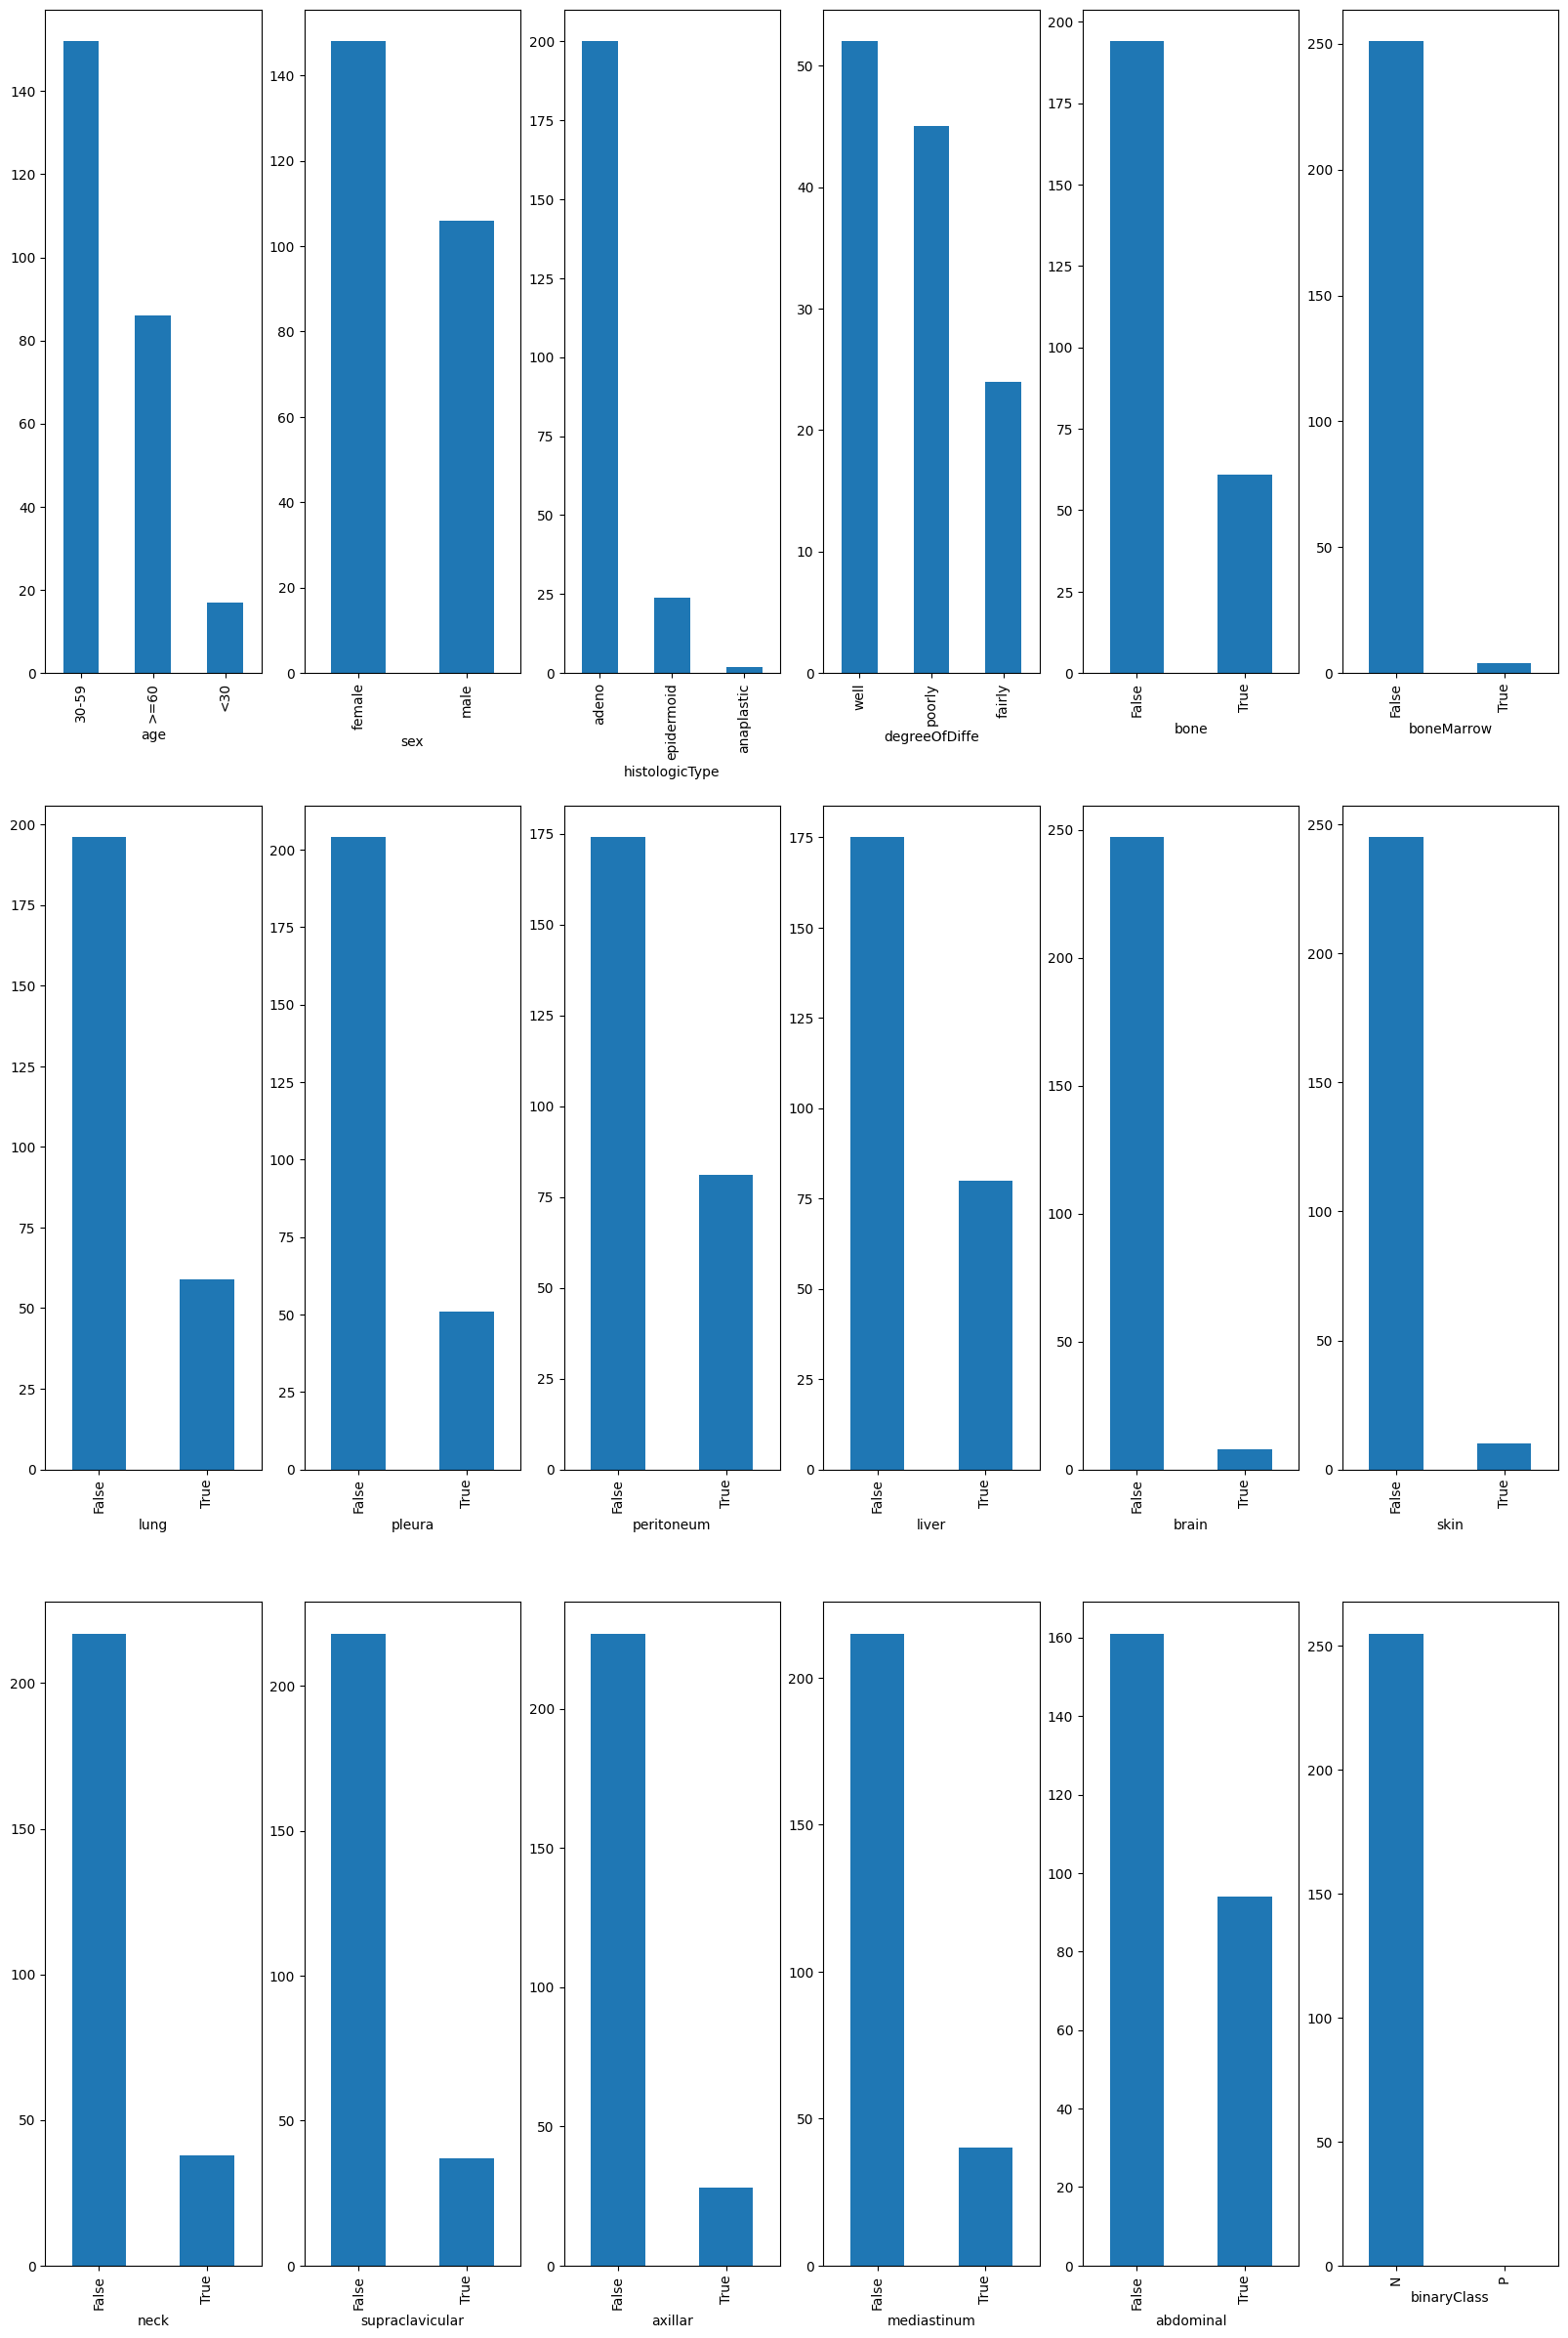

In [ ]:
fign, axes = plt.subplots(nrows = 3, ncols=6, figsize=(20,30))

negDf.age.value_counts().plot(kind='bar', ax=axes[0,0])
negDf.sex.value_counts().plot(kind='bar', ax=axes[0,1])
negDf.histologicType.value_counts().plot(kind='bar', ax=axes[0,2])
negDf.degreeOfDiffe.value_counts().plot(kind='bar', ax=axes[0,3])
negDf.bone.value_counts().plot(kind='bar', ax=axes[0,4])
negDf.boneMarrow.value_counts().plot(kind='bar', ax=axes[0,5])
negDf.lung.value_counts().plot(kind='bar', ax=axes[1,0])
negDf.pleura.value_counts().plot(kind='bar', ax=axes[1,1])
negDf.peritoneum.value_counts().plot(kind='bar', ax=axes[1,2])
negDf.liver.value_counts().plot(kind='bar', ax=axes[1,3])
negDf.brain.value_counts().plot(kind='bar', ax=axes[1,4])
negDf.skin.value_counts().plot(kind='bar', ax=axes[1,5])
negDf.neck.value_counts().plot(kind='bar', ax=axes[2,0])
negDf.supraclavicular.value_counts().plot(kind='bar', ax=axes[2,1])
negDf.axillar.value_counts().plot(kind='bar', ax=axes[2,2])
negDf.mediastinum.value_counts().plot(kind='bar', ax=axes[2,3])
negDf.abdominal.value_counts().plot(kind='bar', ax=axes[2,4])
negDf.binaryClass.value_counts().plot(kind='bar', ax=axes[2,5])

In [ ]:
#Convert so that a correlation heatmap can be made
tumordf = tumordf.replace('<30', 0)
tumordf = tumordf.replace('30-59', 1)
tumordf = tumordf.replace('>=60', 2)

tumordf = tumordf.replace('male', 0)
tumordf = tumordf.replace('female', 1)

tumordf = tumordf.replace('epidermoid', 0)
tumordf = tumordf.replace('adeno', 1)
tumordf = tumordf.replace('anaplastic', 2)

tumordf = tumordf.replace('poorly', 0)
tumordf = tumordf.replace('fairly', 1)
tumordf = tumordf.replace('well', 2)

tumordf = tumordf.replace('N', 0)
tumordf = tumordf.replace('P', 1)
tumordf.head()



age sex histologicType degreeOfDiffe   bone  boneMarrow   lung  pleura  \
0   2   1            NaN           NaN  False       False  False   False   
1   2   0            NaN             0  False       False  False   False   
2   1   1              1           NaN  False       False  False    True   
3   1   1              1           NaN  False       False  False   False   
4   1   1              1           NaN  False       False  False    True   

   peritoneum  liver  brain   skin   neck  supraclavicular  axillar  \
0       False   True  False  False  False            False    False   
1       False   True  False  False  False             True    False   
2       False  False  False   True  False            False     True   
3        True  False  False  False  False            False    False   
4        True  False  False  False  False            False    False   

   mediastinum  abdominal binaryClass  
0        False      False           1  
1         True      False           1  
2        False      False           0  
3        False      False           0  
4        False      False           0

In [ ]:
tumordf.dtypes

age                category
sex                category
histologicType     category
degreeOfDiffe      category
bone                   bool
boneMarrow             bool
lung                   bool
pleura                 bool
peritoneum             bool
liver                  bool
brain                  bool
skin                   bool
neck                   bool
supraclavicular        bool
axillar                bool
mediastinum            bool
abdominal              bool
binaryClass        category
dtype: object

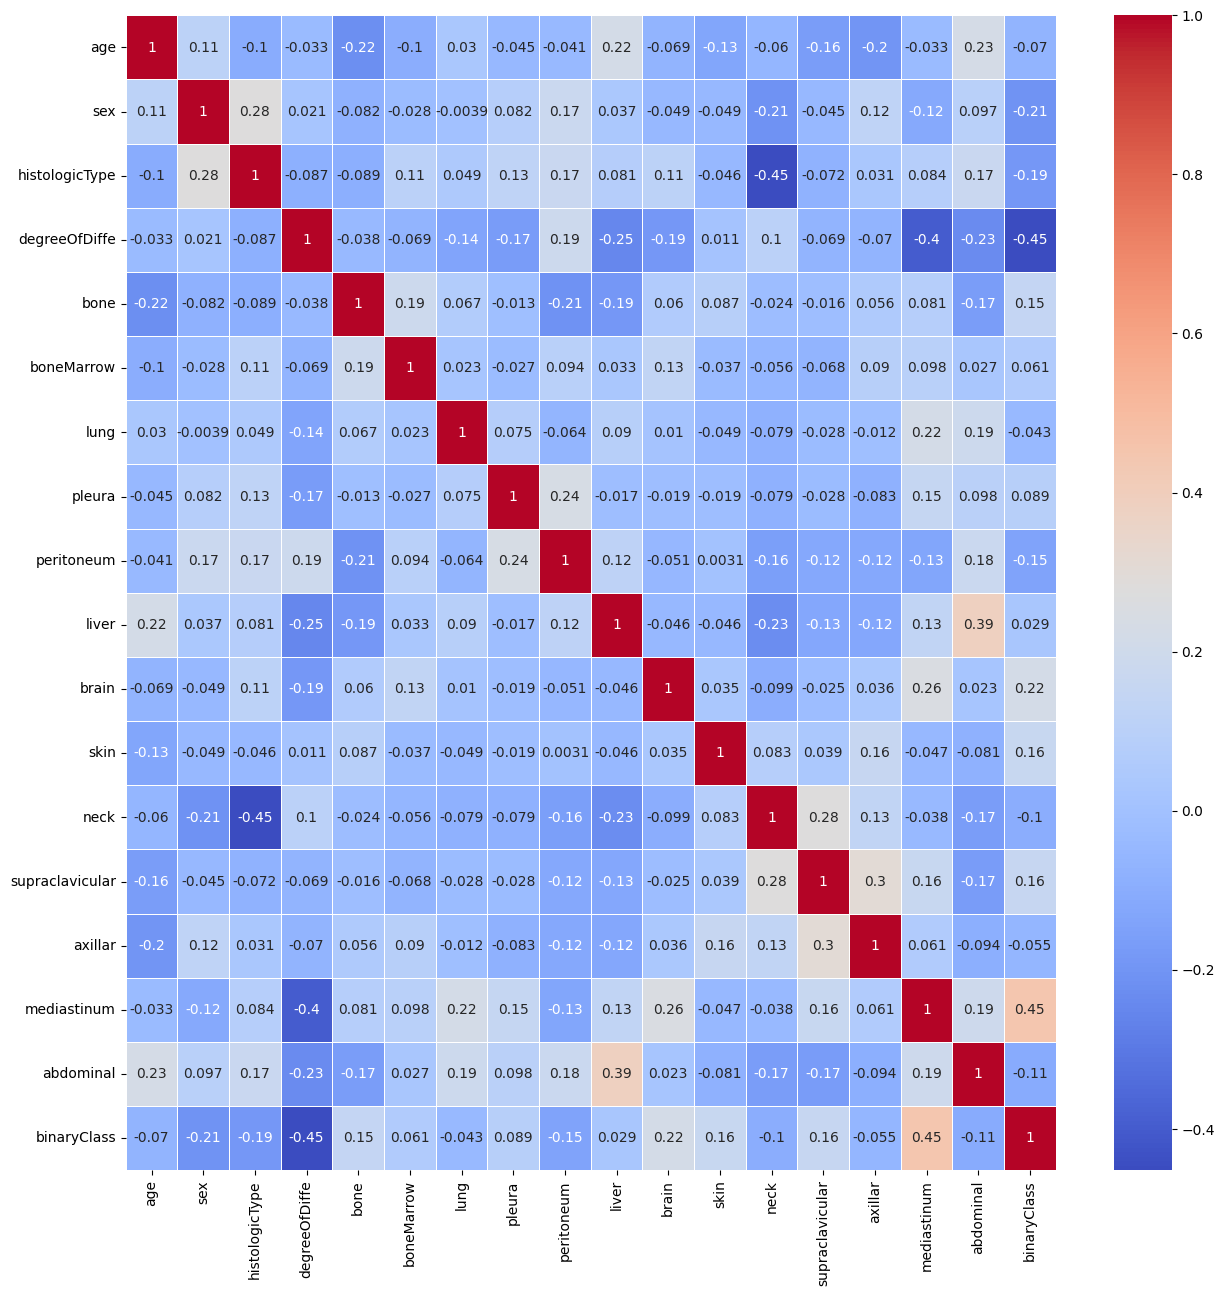

In [ ]:
plt.figure(figsize=(15, 15))
sb.heatmap(tumordf.corr(), linewidths=0.5, annot=True, cmap="coolwarm")
plt.show()

In [ ]:
# Data Pre Processing Section: Wine

winePP = winedf
wineTarget = winedf['quality']

# Feature Transformation Preprocesses

standard_Scaler = preprocessing.StandardScaler()
ssX = standard_Scaler.fit_transform(winePP)
ss_df = pd.DataFrame(ssX)

minMax_Scaler = preprocessing.MinMaxScaler()
mmX = minMax_Scaler.fit_transform(winePP)
mm_df = pd.DataFrame(mmX)

quantile_Scaler = preprocessing.QuantileTransformer()
qsX = quantile_Scaler.fit_transform(winePP)
qs_df = pd.DataFrame(qsX)

robust_Scaler = preprocessing.RobustScaler()
rsX = robust_Scaler.fit_transform(winePP)
rs_df = pd.DataFrame(rsX)

maxAbs_Scaler = preprocessing.MaxAbsScaler()
masX = maxAbs_Scaler.fit_transform(winePP)
mas_df = pd.DataFrame(masX)

# Undersampling?

# Oversampling?

def makeWineGraphs(data1):
  data1.describe().T
  data1.hist(bins=25, figsize=(13, 13))
  plt.show()
  plt.figure(figsize=(12, 12))
  sb.heatmap(data1.corr(), linewidths=0.5, annot=True, cmap="coolwarm")
  plt.show()
  data1["target"] = wineTarget
  #sb.pairplot(data1, hue="target", palette="crest", height=2)
  plt.show()


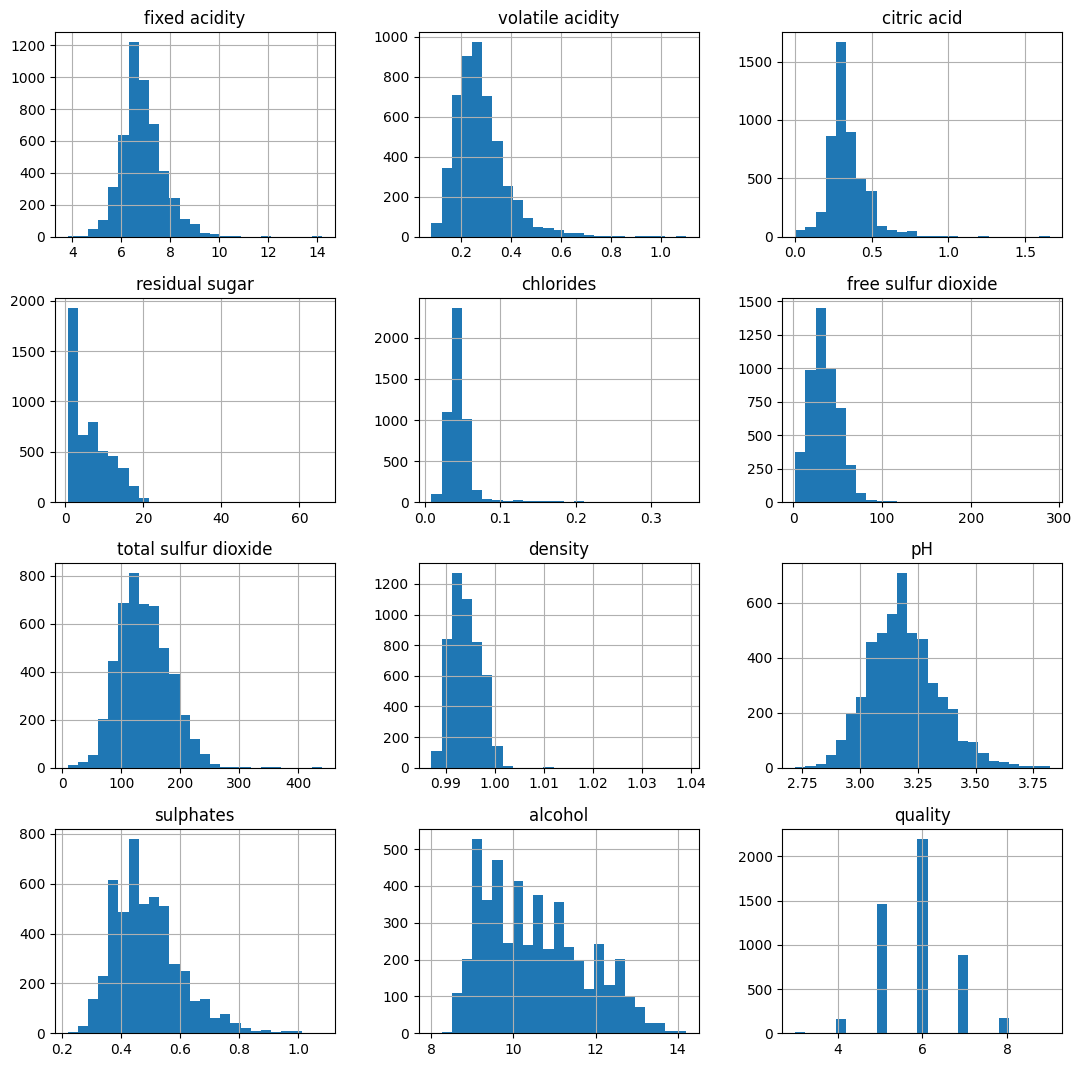

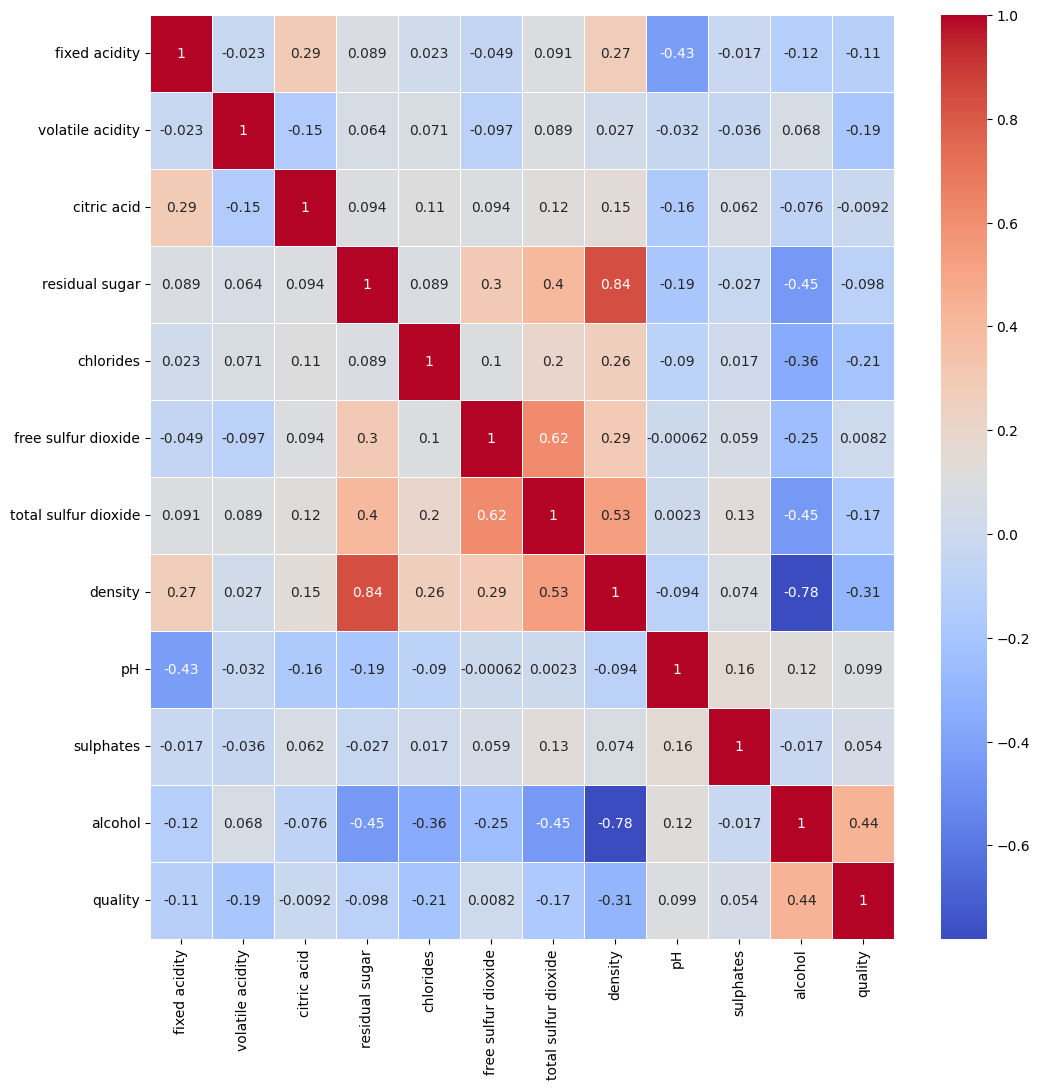

In [ ]:
makeWineGraphs(winePP)

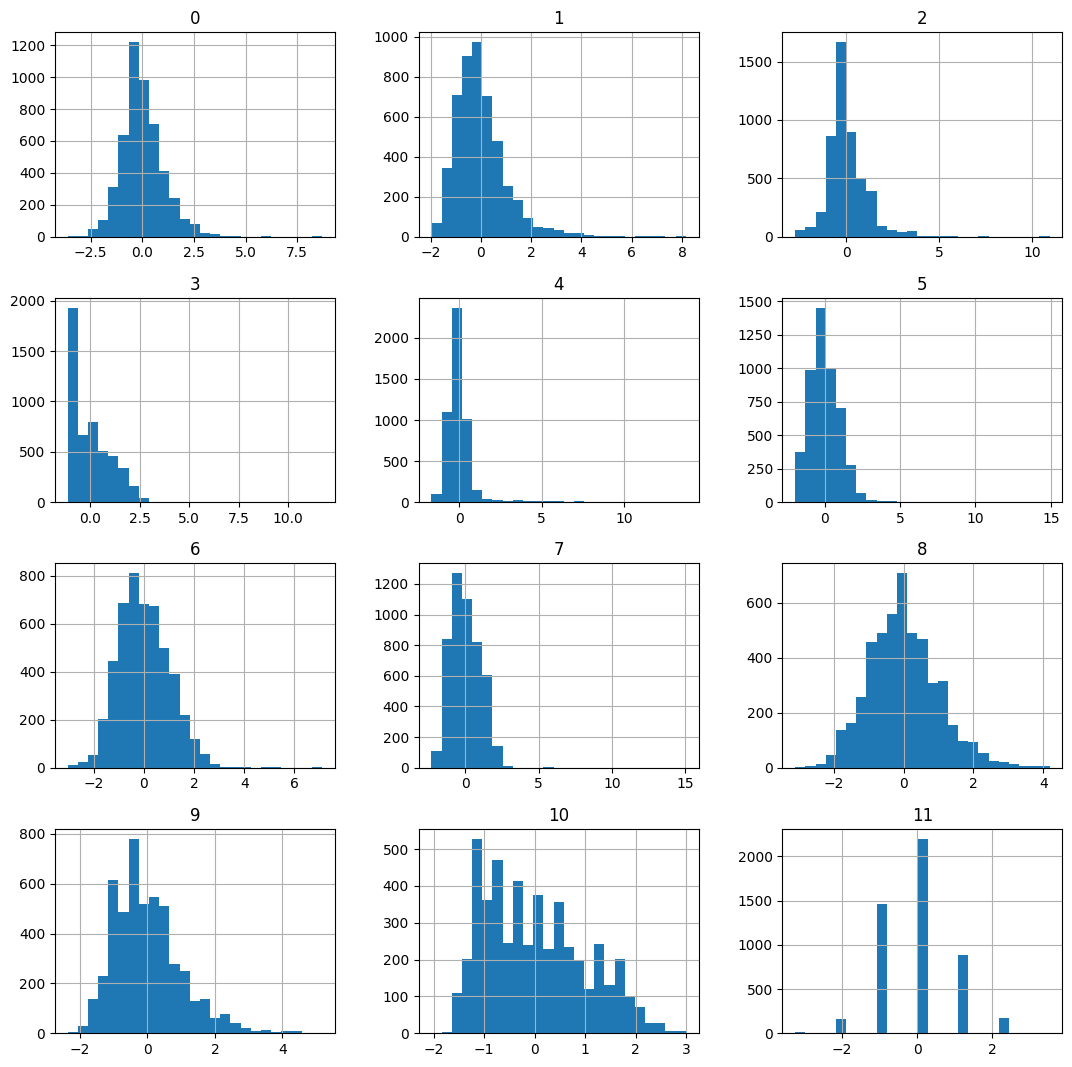

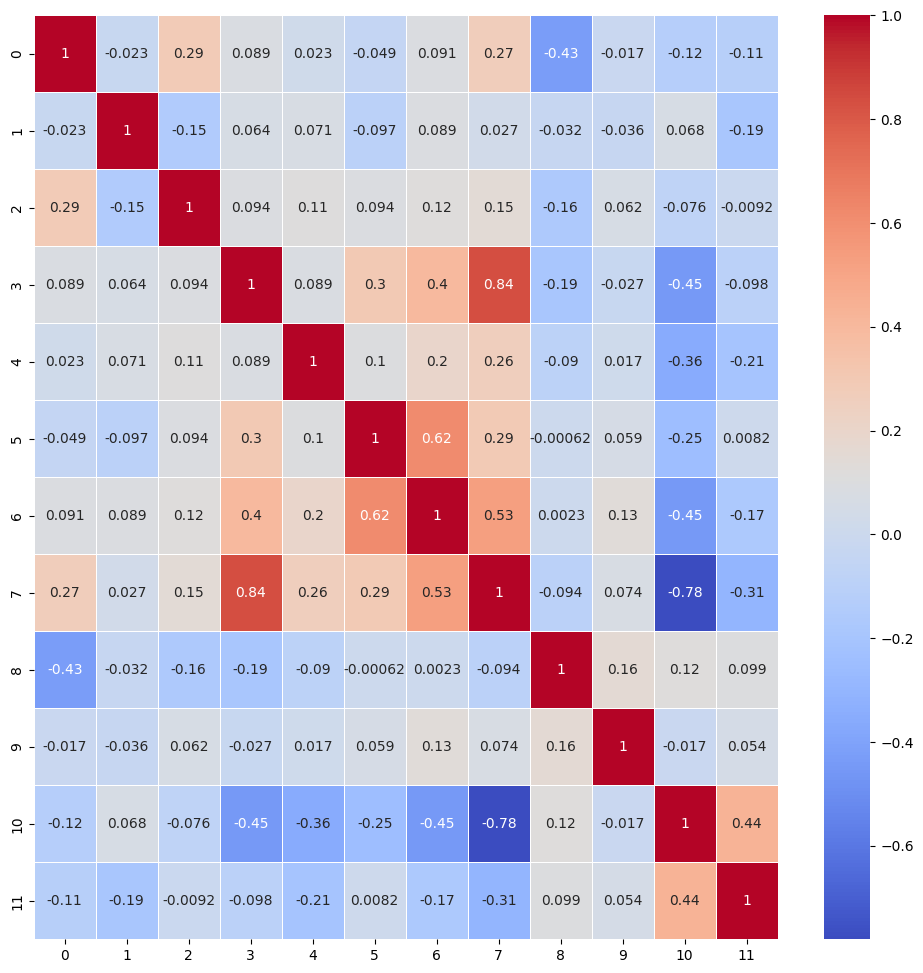

In [ ]:
makeWineGraphs(ss_df)

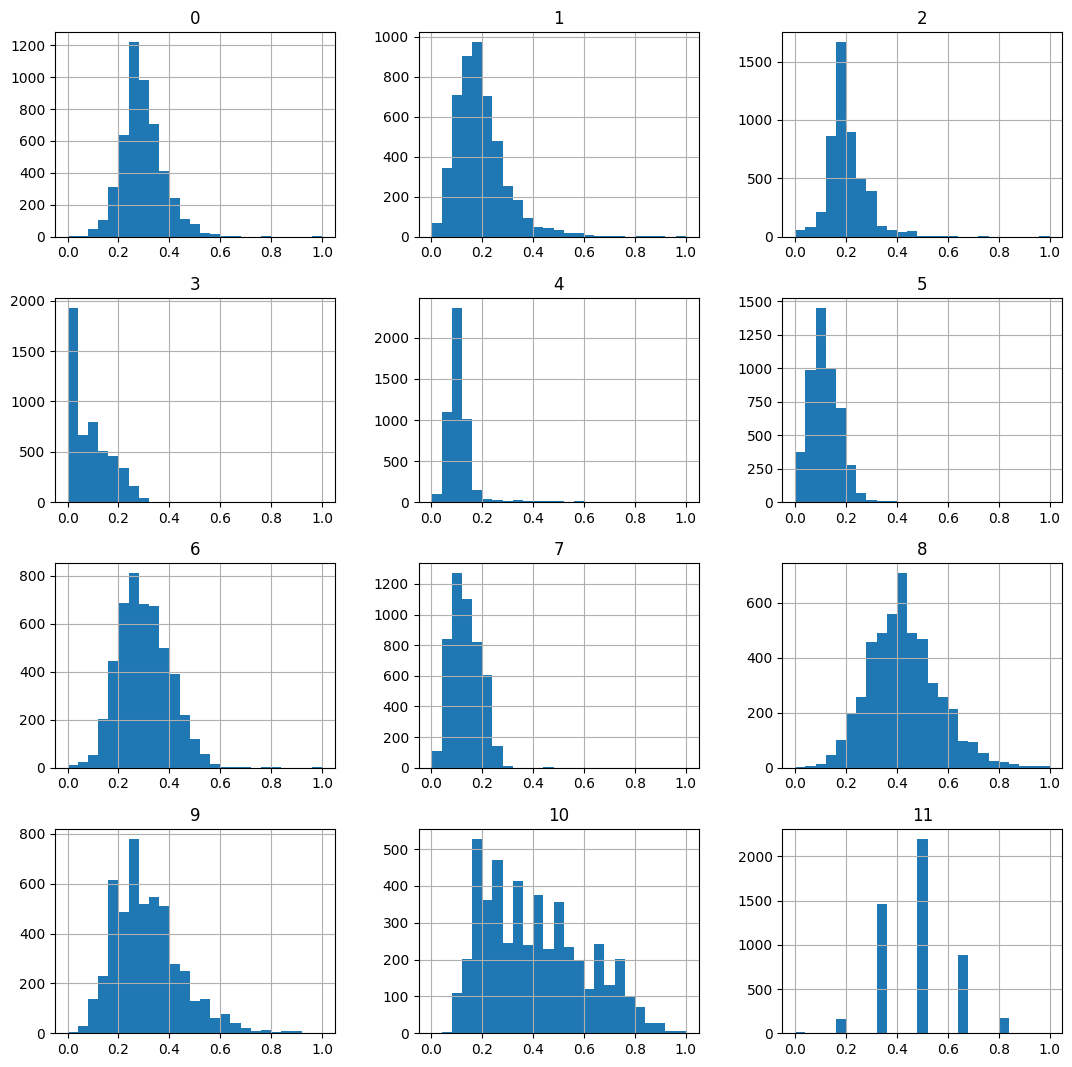

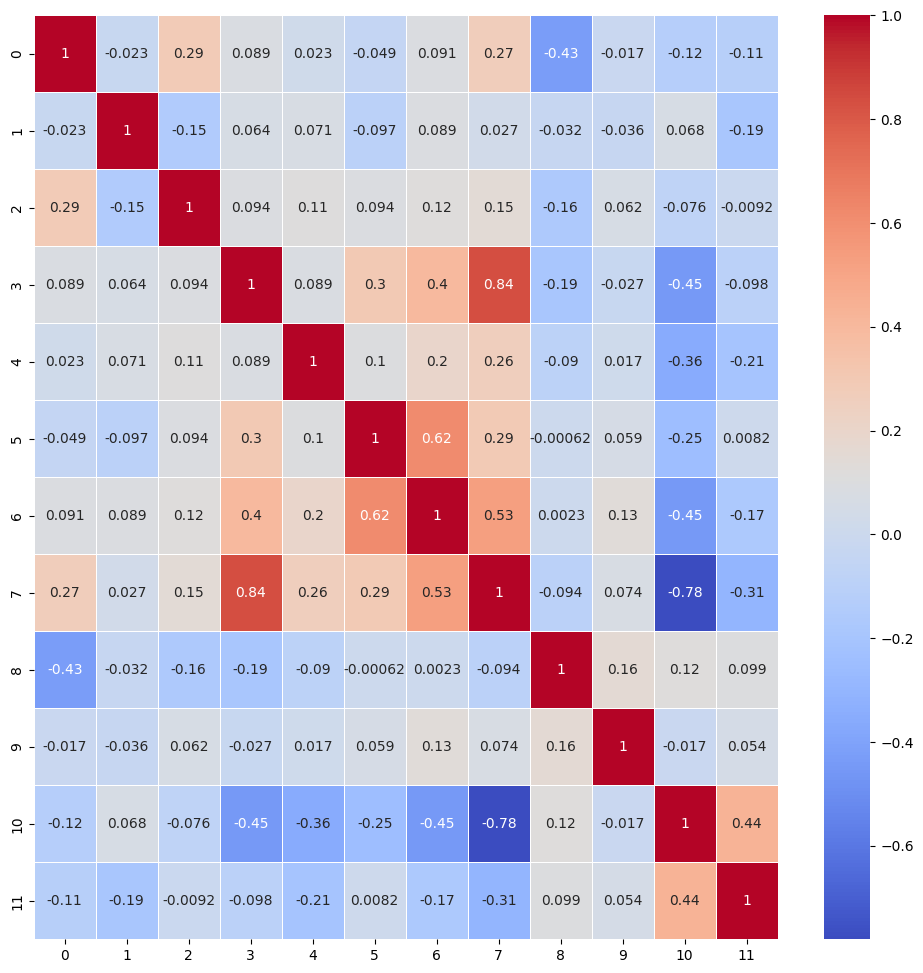

In [ ]:
makeWineGraphs(mm_df)

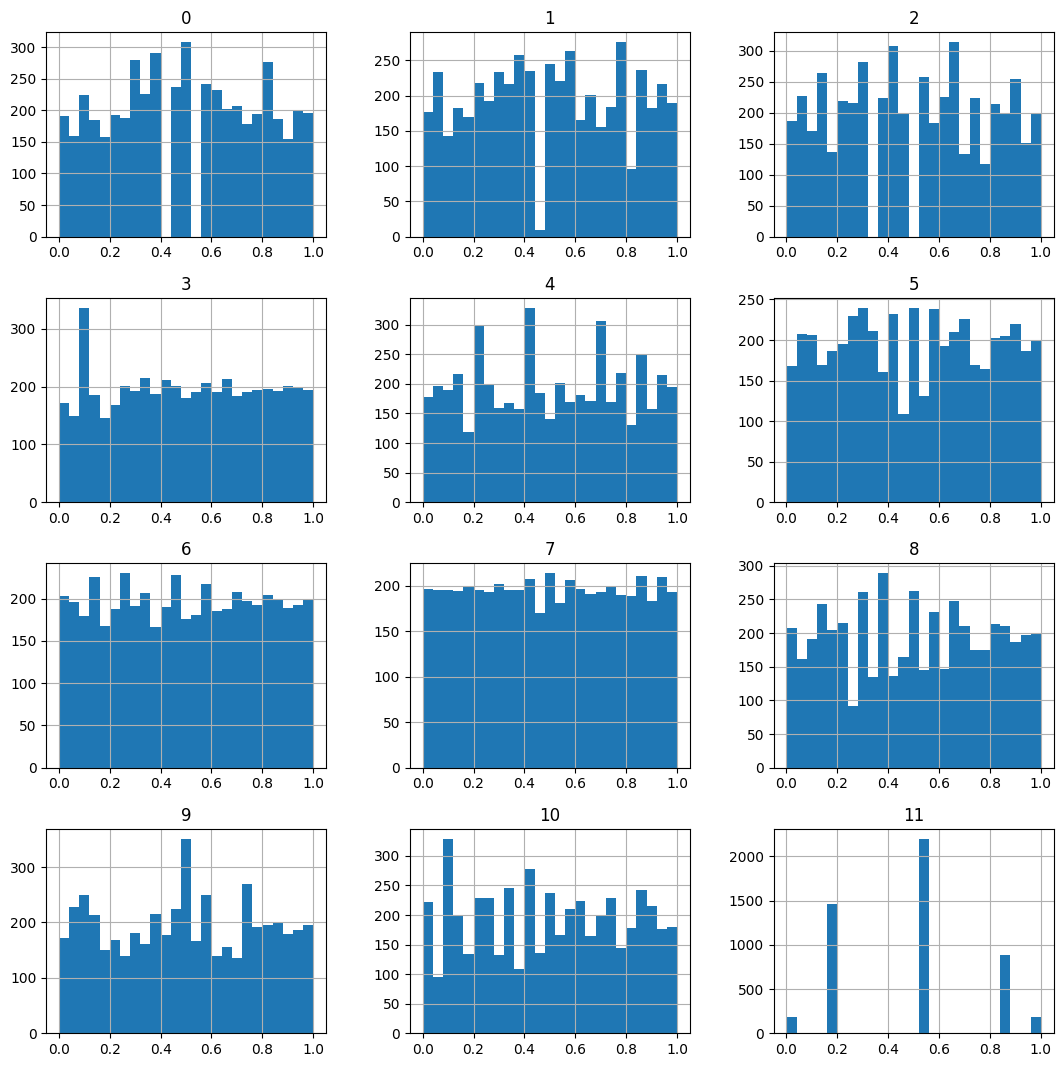

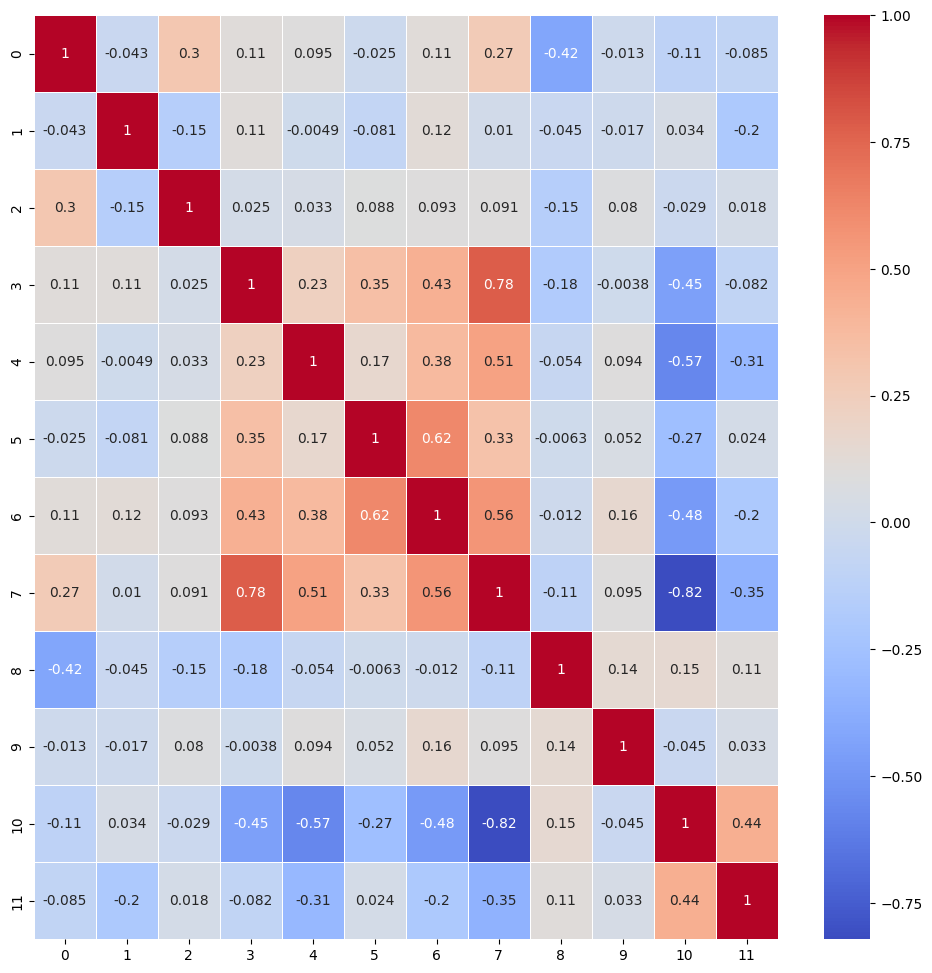

In [ ]:
makeWineGraphs(qs_df)

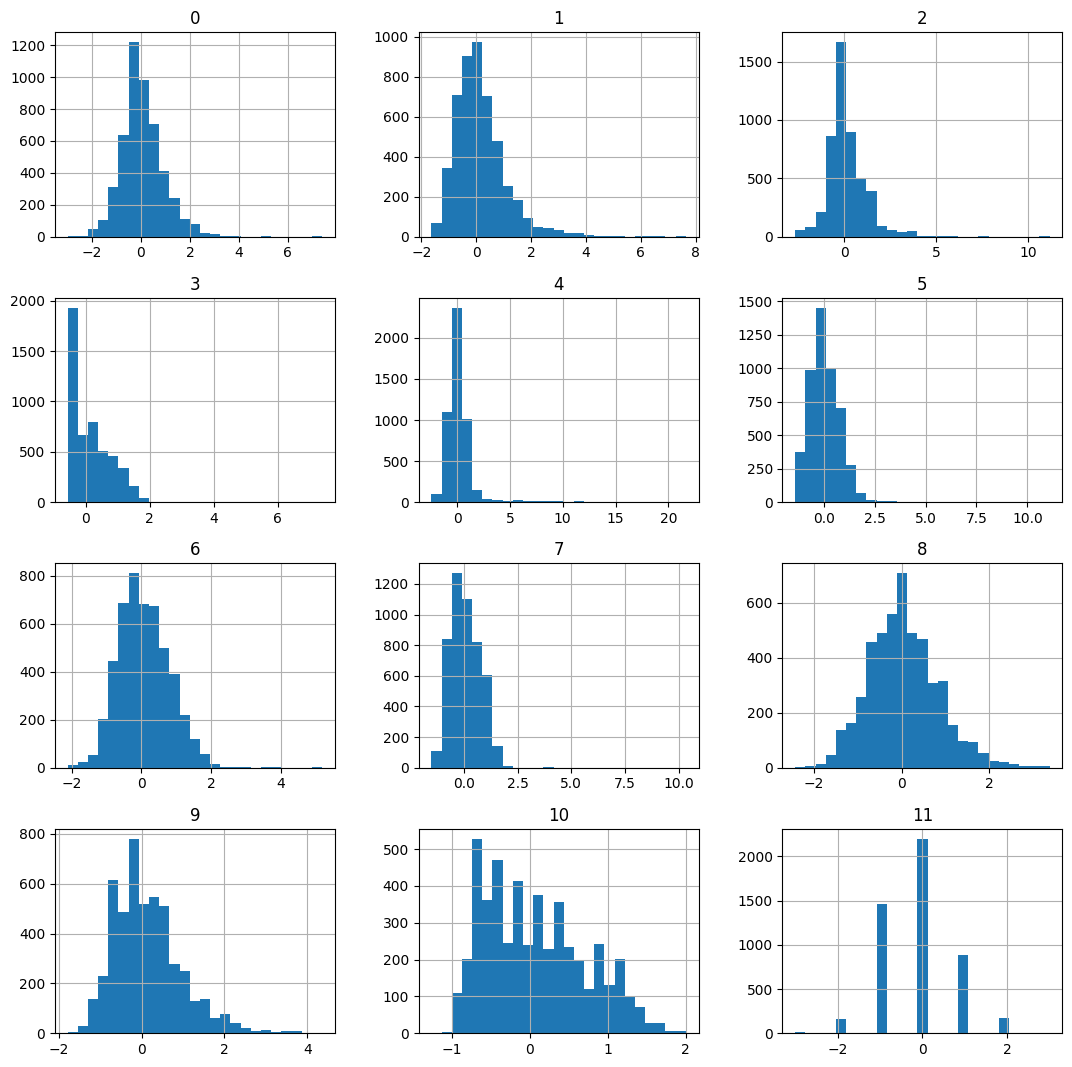

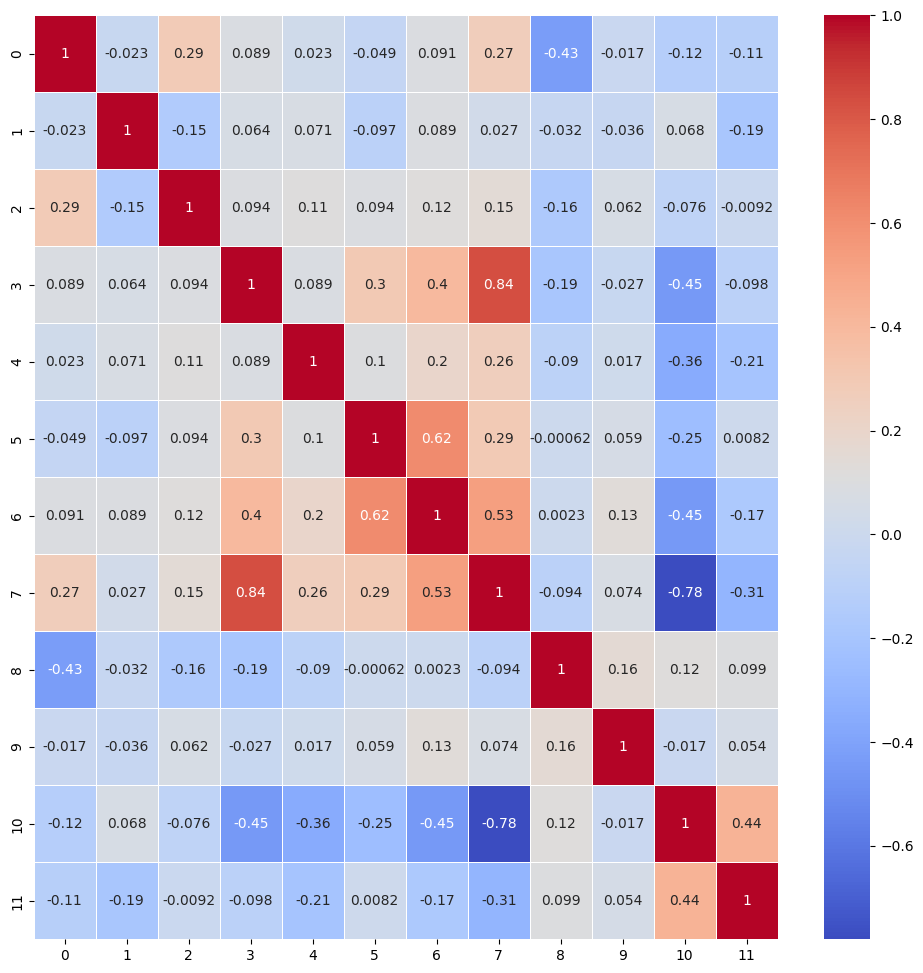

In [ ]:
makeWineGraphs(rs_df)

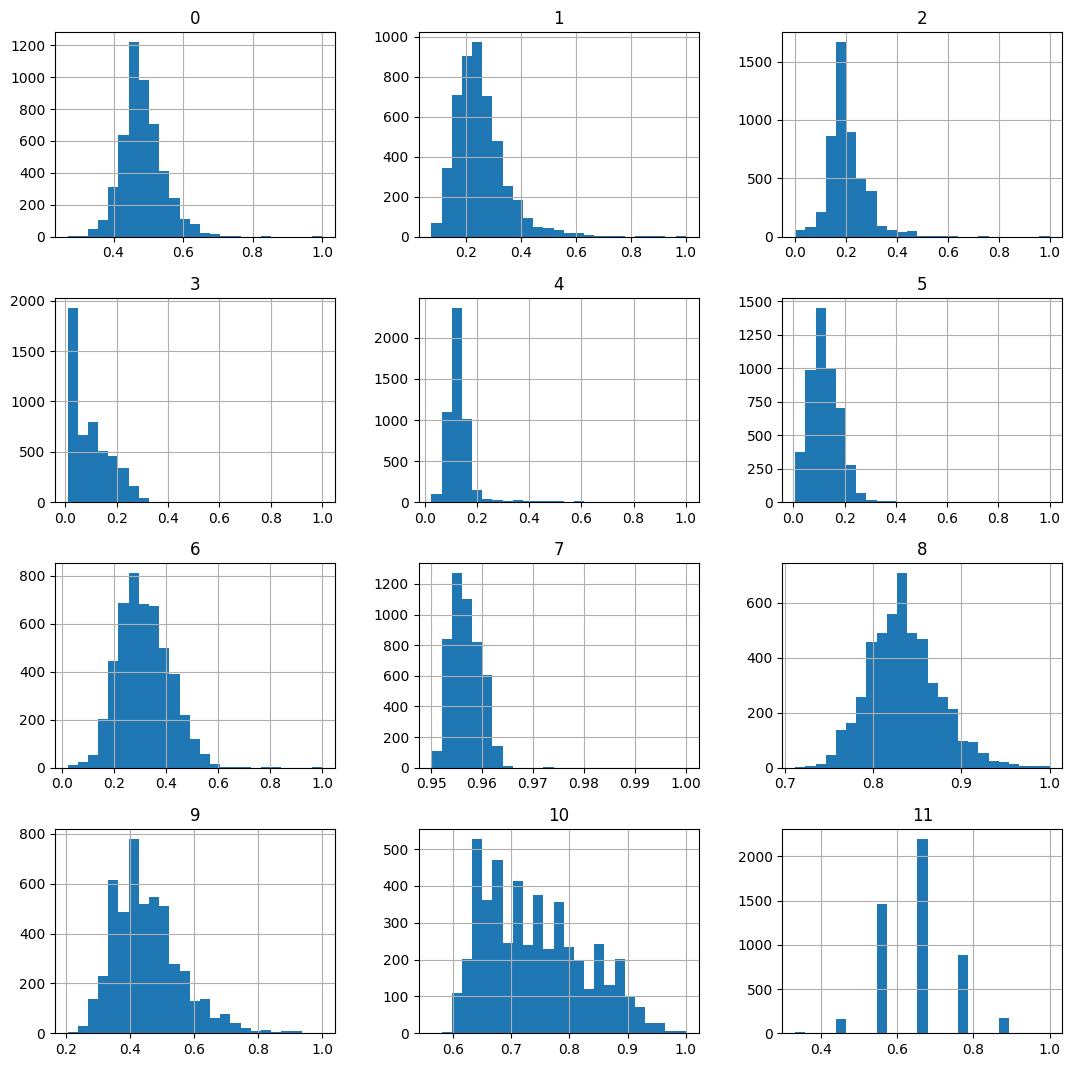

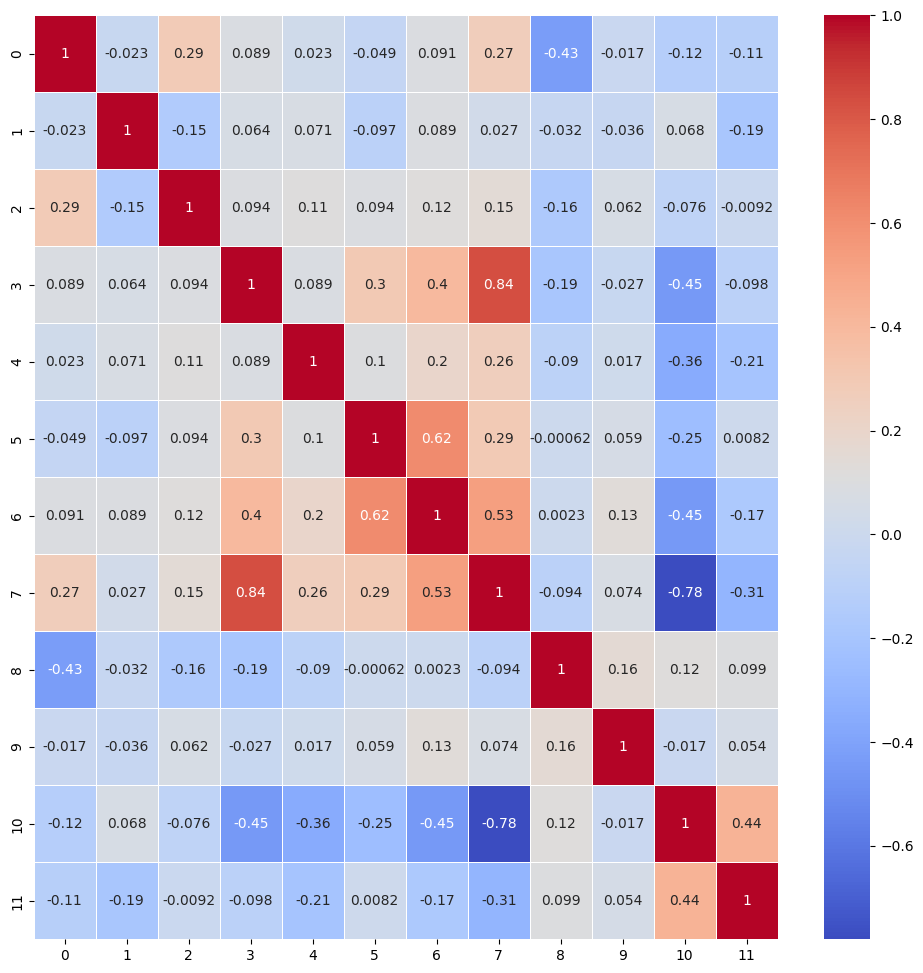

In [ ]:
makeWineGraphs(mas_df)

In [ ]:
# Data Pre Processing Section: Tumor

tumorPP = tumordf
tumorTarget = tumordf['binaryClass']

# Feature Transformation Preprocesses

standard_Scaler = preprocessing.StandardScaler()
ssX = standard_Scaler.fit_transform(tumorPP)
tss_df = pd.DataFrame(ssX)

minMax_Scaler = preprocessing.MinMaxScaler()
mmX = minMax_Scaler.fit_transform(tumorPP)
tmm_df = pd.DataFrame(mmX)

quantile_Scaler = preprocessing.QuantileTransformer()
qsX = quantile_Scaler.fit_transform(tumorPP)
tqs_df = pd.DataFrame(qsX)

robust_Scaler = preprocessing.RobustScaler()
rsX = robust_Scaler.fit_transform(tumorPP)
trs_df = pd.DataFrame(rsX)

maxAbs_Scaler = preprocessing.MaxAbsScaler()
masX = maxAbs_Scaler.fit_transform(tumorPP)
tmas_df = pd.DataFrame(masX)


def makeTumorGraphs(data2):
  data2.describe().T
  data2.hist(bins=25, figsize=(13, 13))
  plt.show()
  plt.figure(figsize=(12, 12))
  sb.heatmap(data2.corr(), linewidths=0.5, annot=True, cmap="coolwarm")
  plt.show()
  data2["target"] = tumorTarget
  #sb.pairplot(data2, hue="target", palette="tab10", height=2)
  plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (339). n_quantiles is set to n_samples.
  warnings.warn(


In [ ]:
tumorPP

age sex histologicType degreeOfDiffe   bone  boneMarrow   lung  pleura  \
0     2   1            NaN           NaN  False       False  False   False   
1     2   0            NaN             0  False       False  False   False   
2     1   1              1           NaN  False       False  False    True   
3     1   1              1           NaN  False       False  False   False   
4     1   1              1           NaN  False       False  False    True   
..   ..  ..            ...           ...    ...         ...    ...     ...   
334   1   1              1             2  False       False  False   False   
335   1   0              0             0   True       False  False   False   
336   1   1              1             2  False       False  False    True   
337   1   1              1           NaN   True       False   True    True   
338   1   1              1             2  False       False  False    True   

     peritoneum  liver  brain   skin   neck  supraclavicular  axillar  \
0         False   True  False  False  False            False    False   
1         False   True  False  False  False             True    False   
2         False  False  False   True  False            False     True   
3          True  False  False  False  False            False    False   
4          True  False  False  False  False            False    False   
..          ...    ...    ...    ...    ...              ...      ...   
334        True  False  False  False  False            False    False   
335       False  False  False   True  False            False     True   
336        True  False  False  False  False            False    False   
337        True   True   True  False  False            False    False   
338        True  False  False  False  False            False    False   

     mediastinum  abdominal binaryClass  
0          False      False           1  
1           True      False           1  
2          False      False           0  
3          False      False           0  
4          False      False           0  
..           ...        ...         ...  
334        False      False           0  
335        False      False           1  
336        False      False           0  
337        False       True           0  
338        False      False           0  

[339 rows x 18 columns]

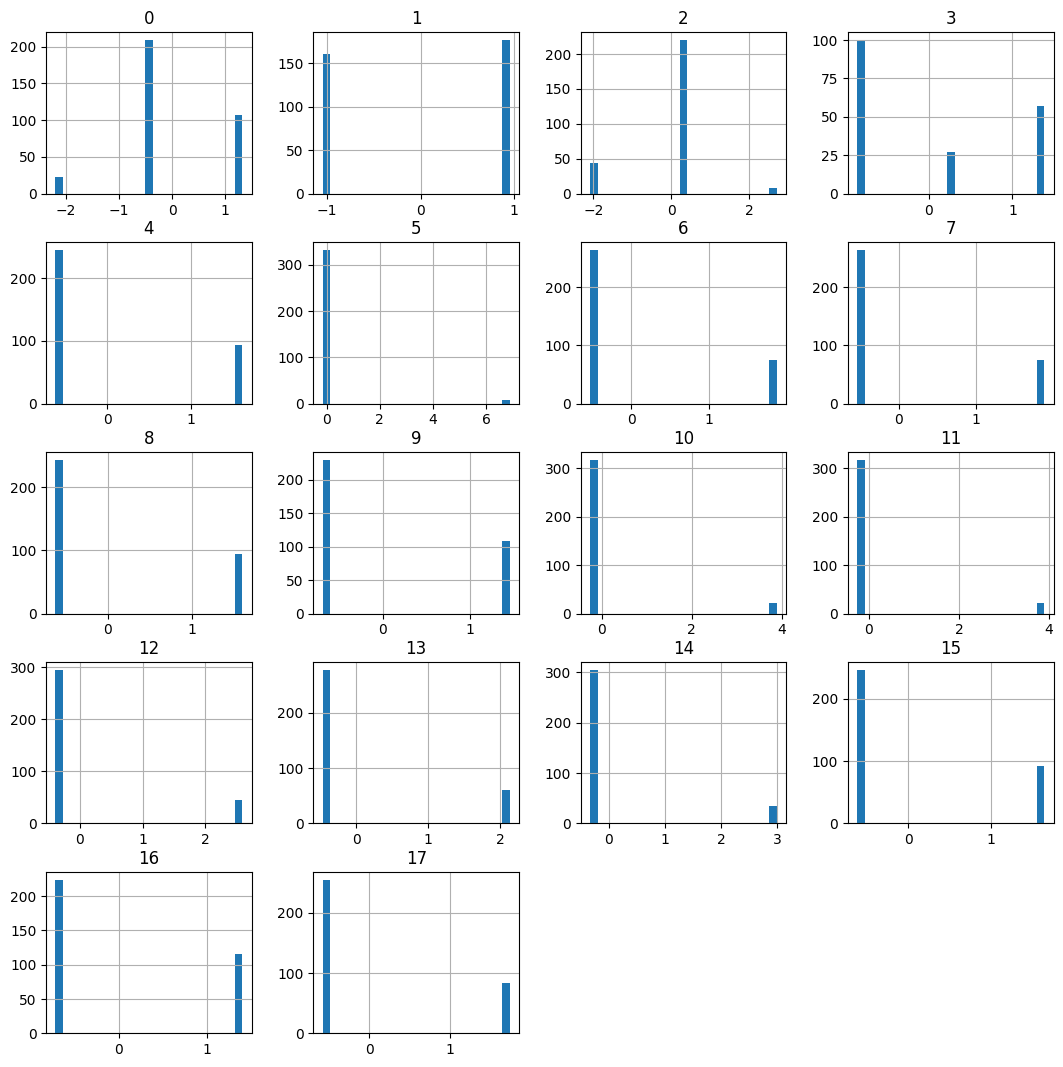

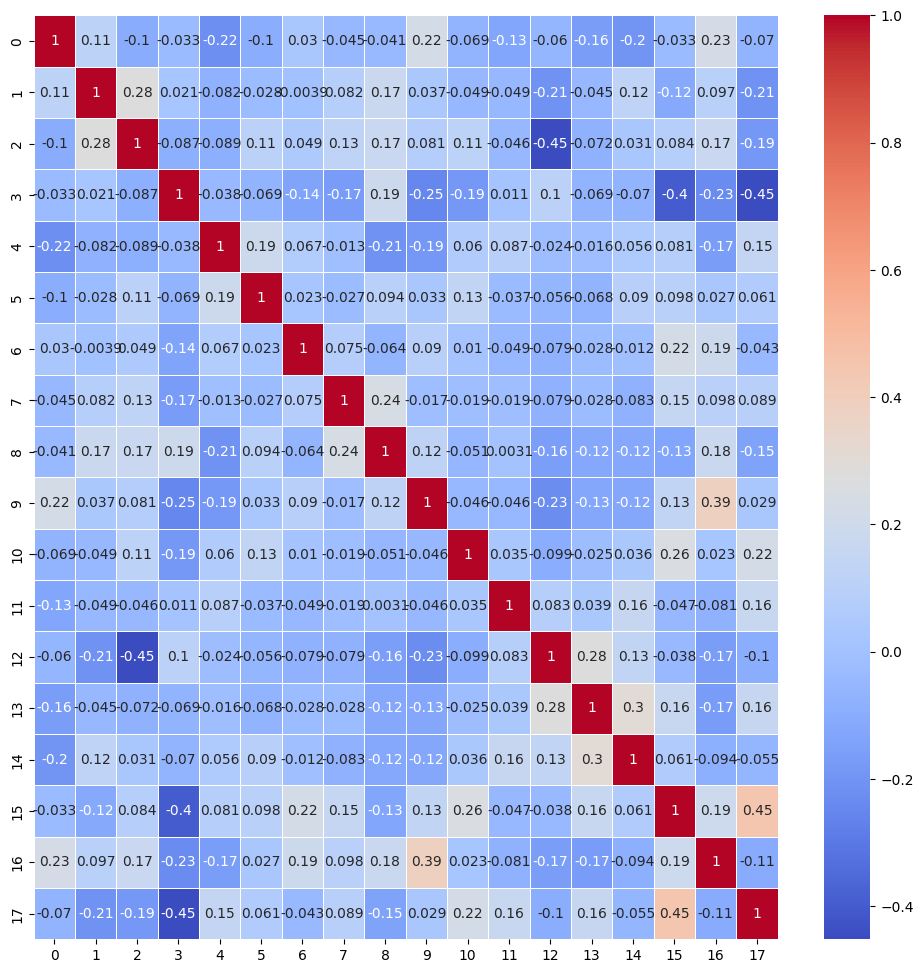

In [ ]:
makeTumorGraphs(tss_df)

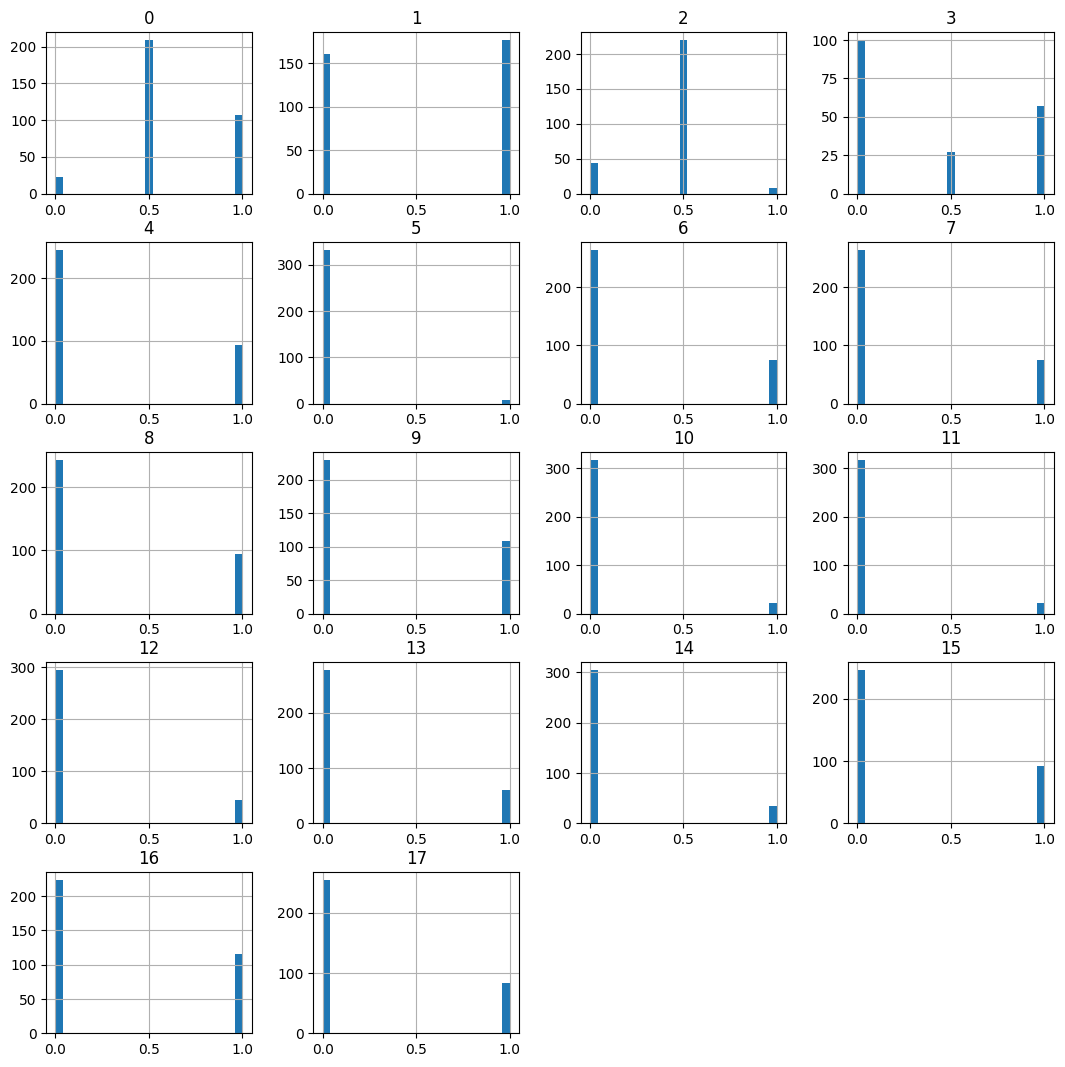

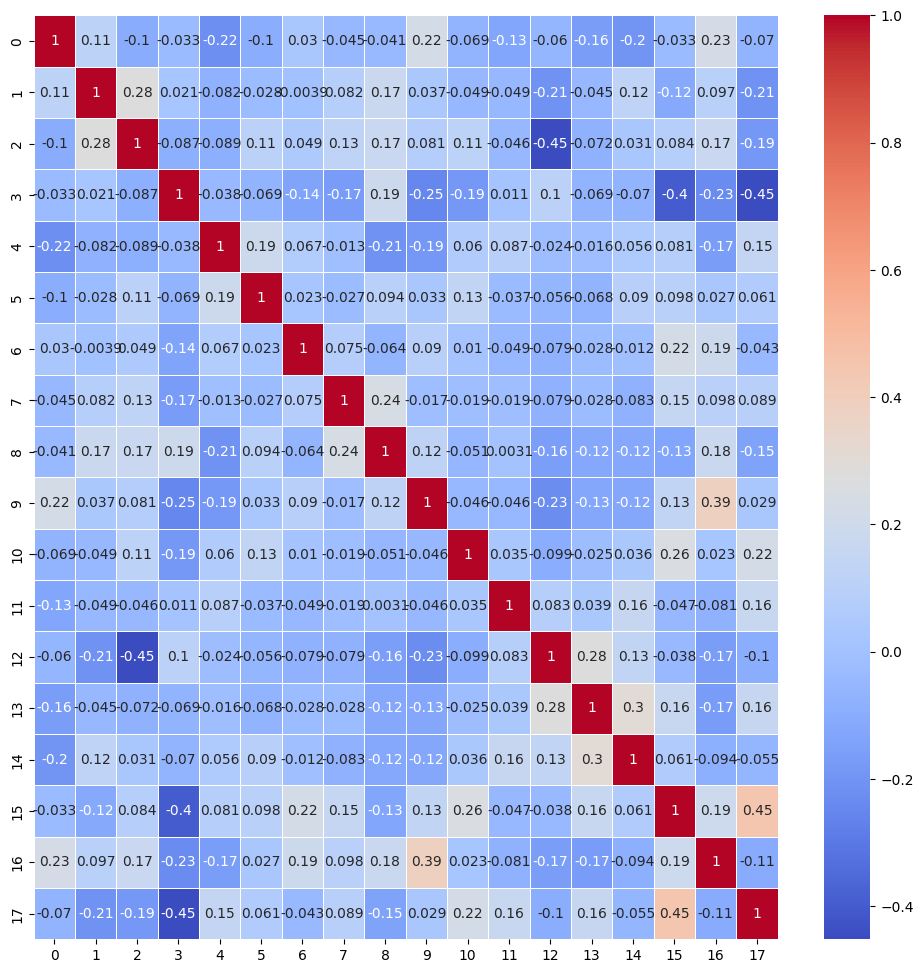

In [ ]:
makeTumorGraphs(tmm_df)

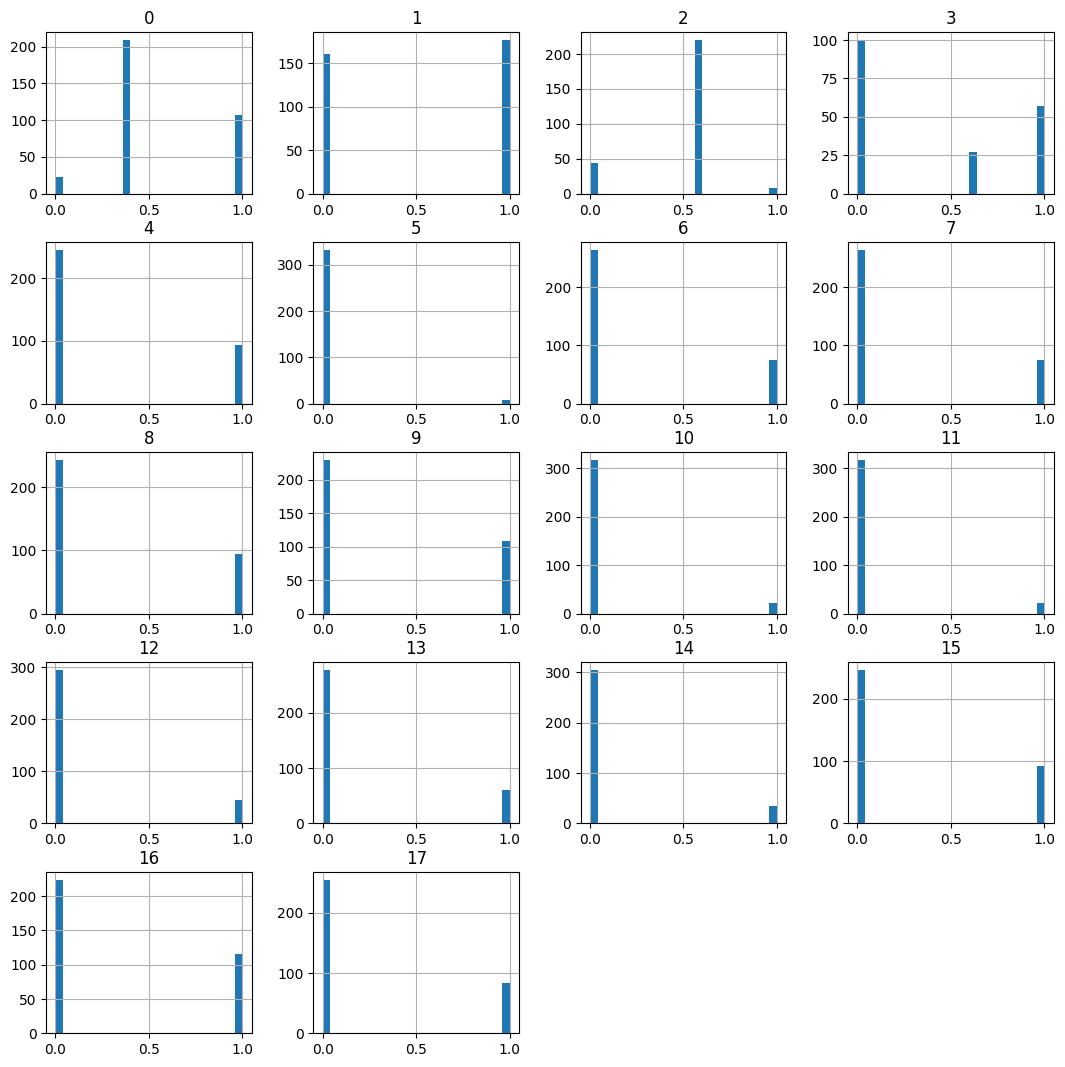

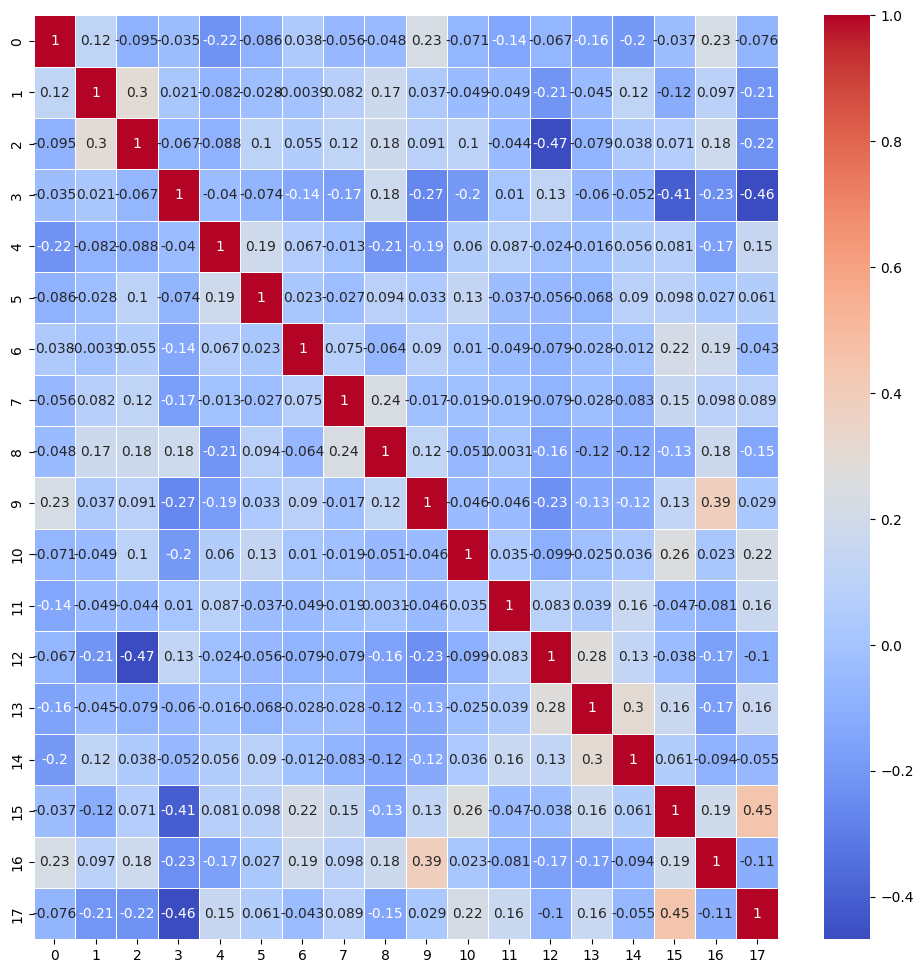

In [ ]:
makeTumorGraphs(tqs_df)

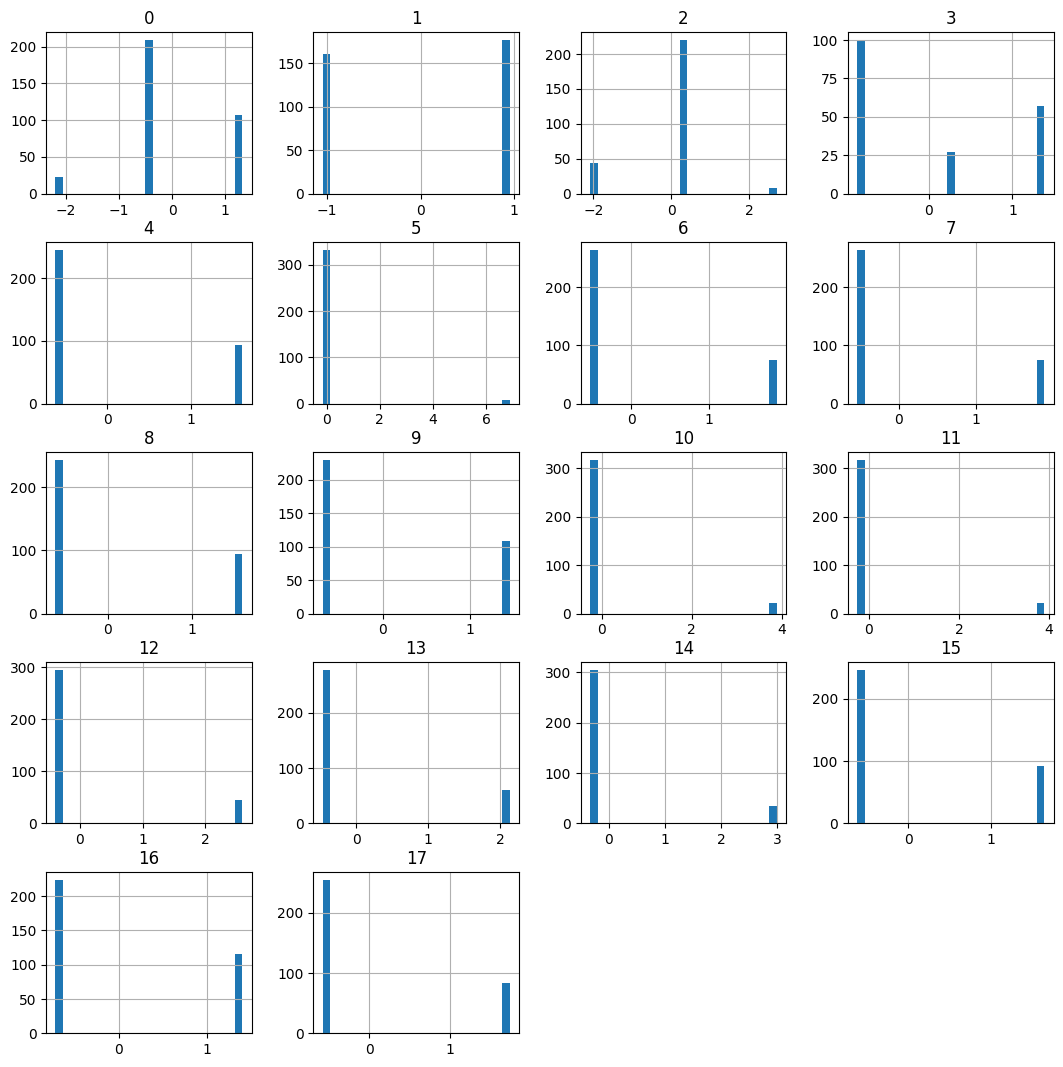

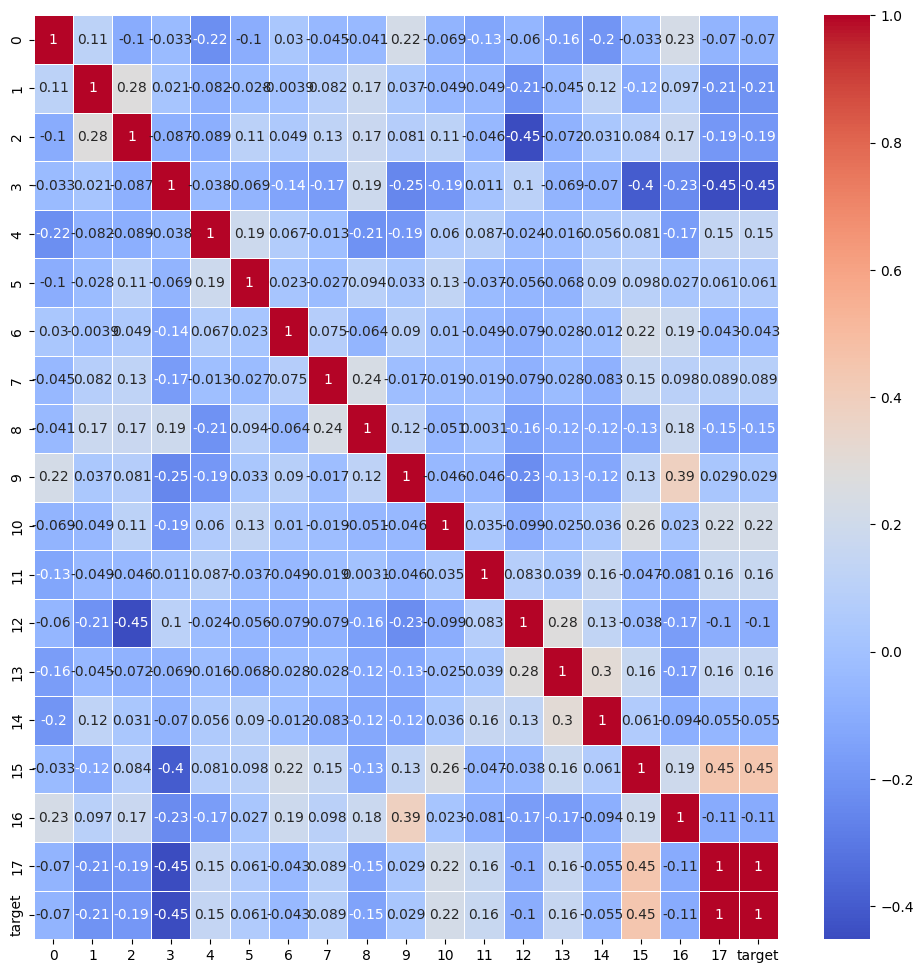

In [ ]:
makeTumorGraphs(tss_df)

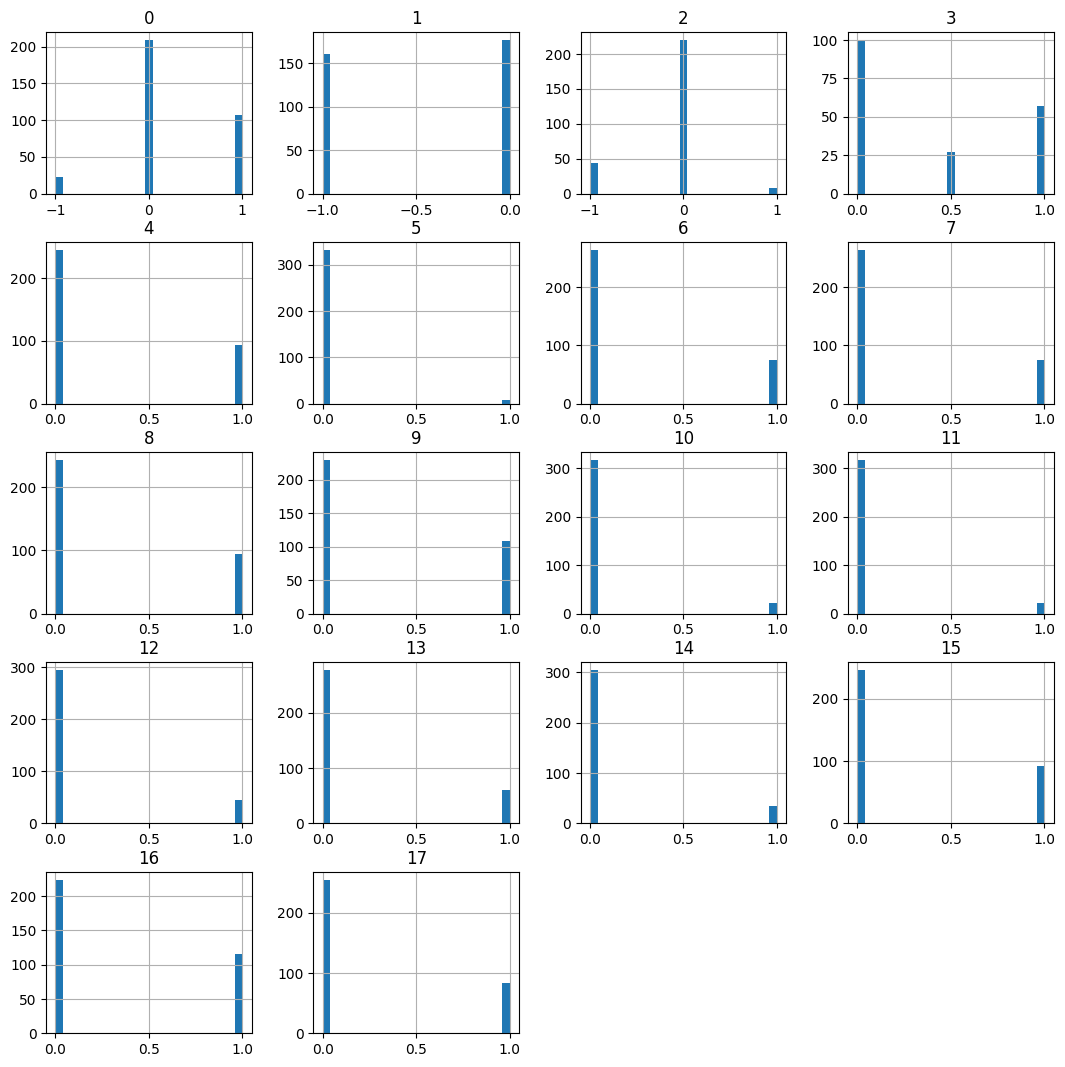

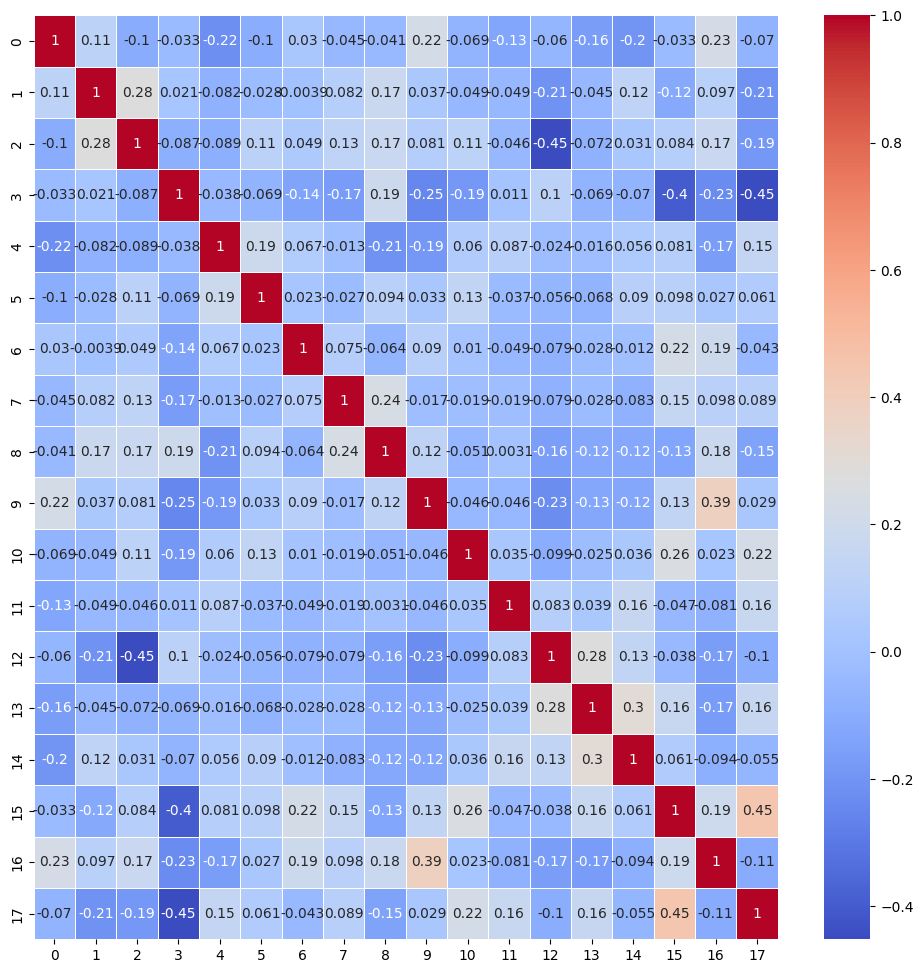

In [ ]:
makeTumorGraphs(trs_df)

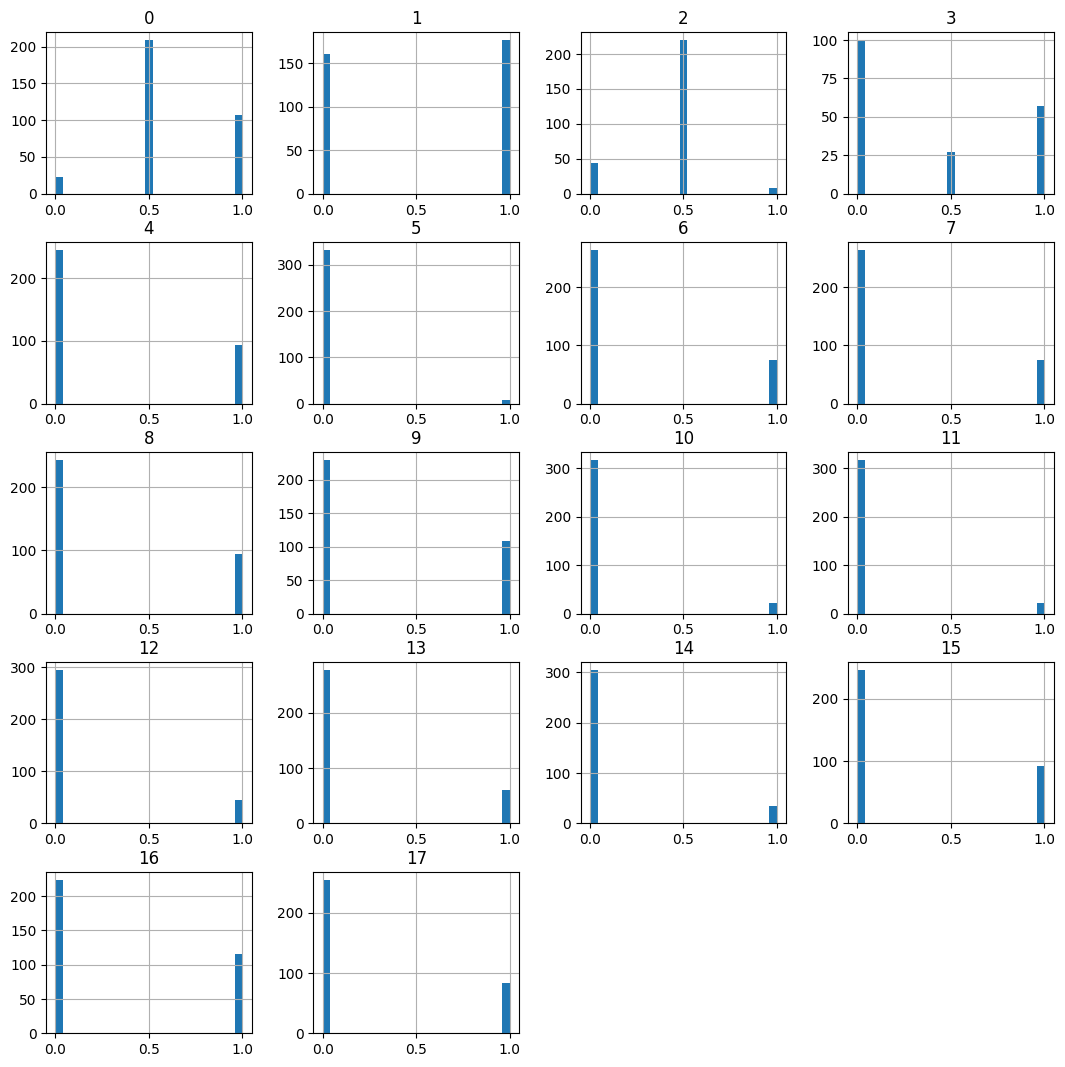

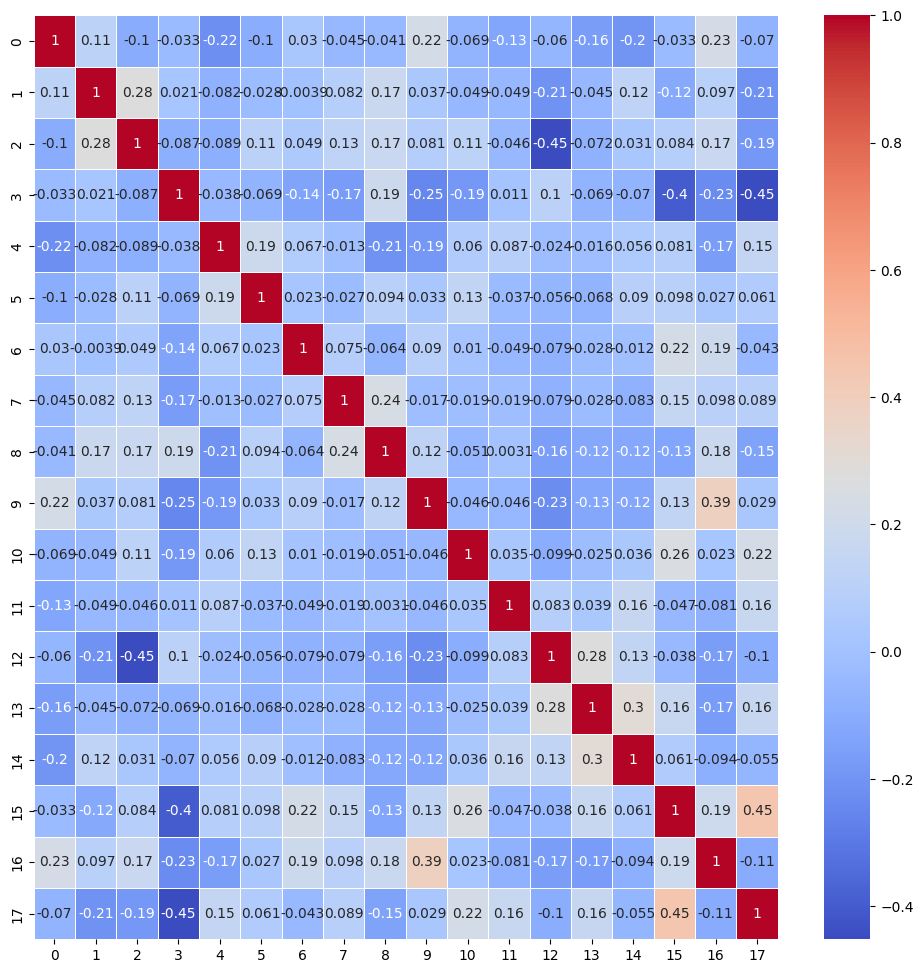

In [ ]:
makeTumorGraphs(tmas_df)

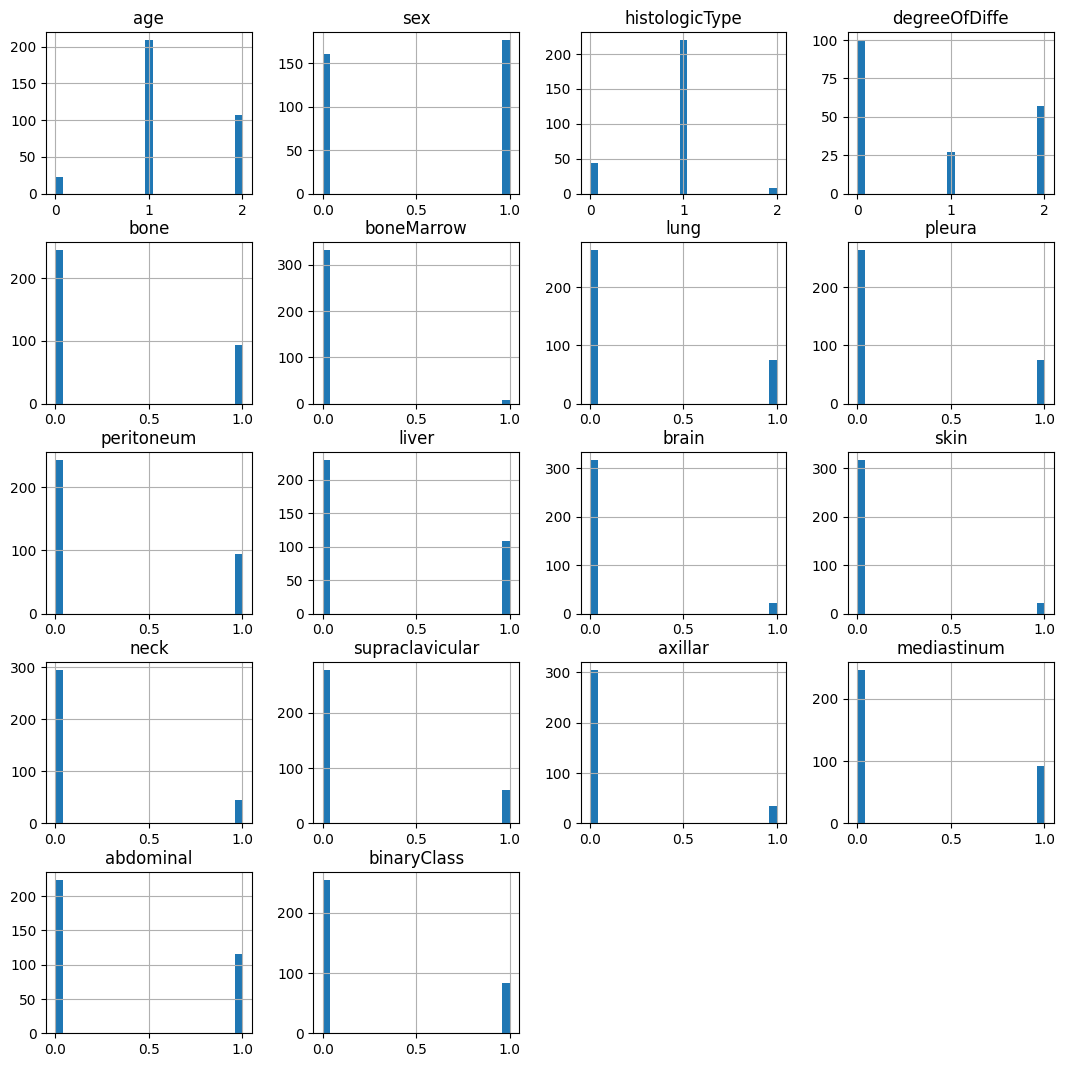

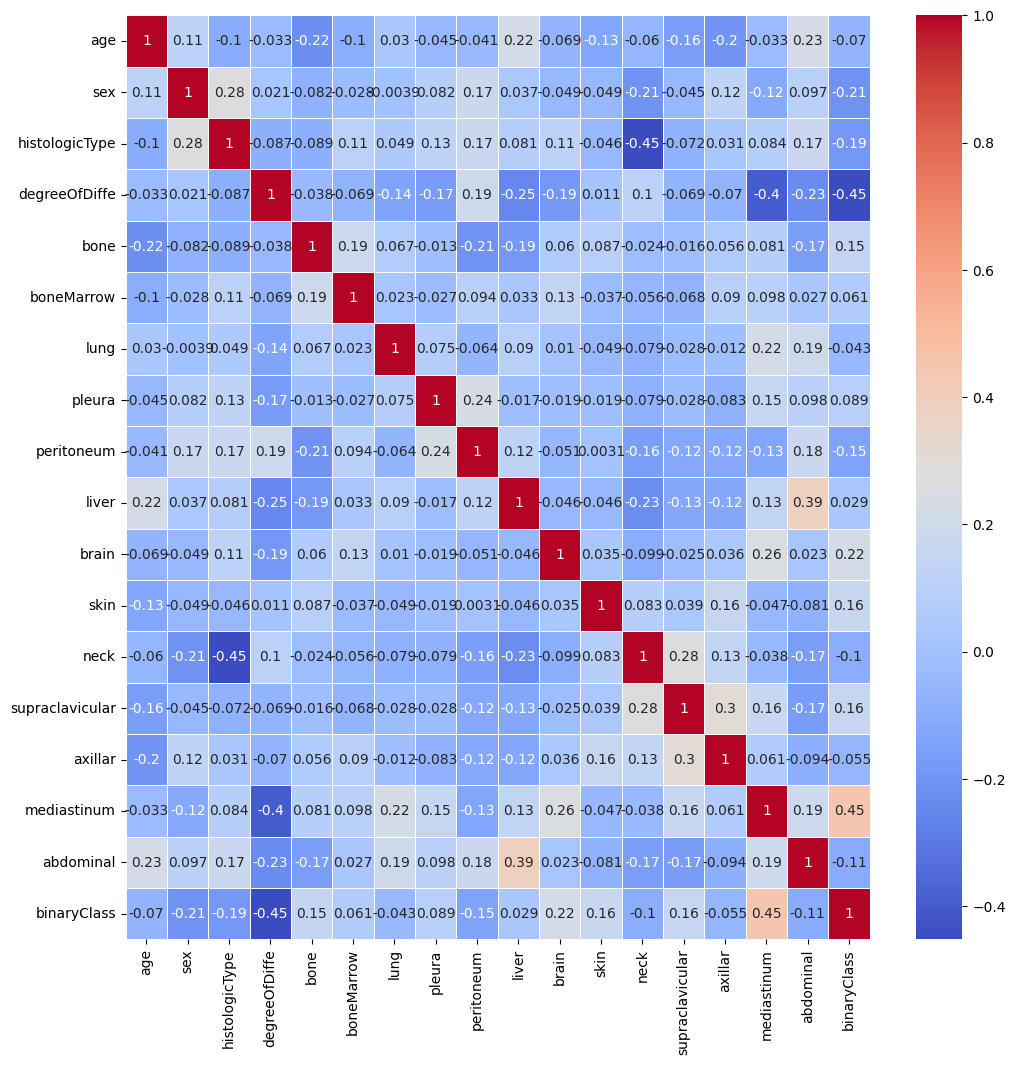

In [ ]:
tumorOrig = tumorPP.replace('True', 1)
tumorOrig = tumorOrig.replace('False', 0)
tumorOrig = tumorOrig.astype('float64')
makeTumorGraphs(tumorOrig)